In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
import h5py

plt.rcParams["figure.figsize"] = (20,15)

# Initial Setups
These steps are done to import data from the provided file into an array.

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')
hf

<HDF5 file "gammaray_lab4.h5" (mode r)>

In [4]:
hf.keys()

<KeysViewHDF5 ['data']>

In [5]:
data = np.array(hf.get('data'))
data

array([[9.40680016e+08, 9.40680016e+08, 9.40680016e+08, ...,
        9.43272016e+08, 9.43272016e+08, 9.43272016e+08],
       [3.15000000e+02, 3.15007112e+02, 3.15014225e+02, ...,
        3.45319109e+02, 3.45326221e+02, 3.45333333e+02],
       [4.50000000e+01, 4.50066667e+01, 4.50133333e+01, ...,
        4.49866667e+01, 4.49933333e+01, 4.50000000e+01],
       [1.00000000e+01, 8.00000000e+00, 7.00000000e+00, ...,
        8.00000000e+00, 1.10000000e+01, 1.20000000e+01]])

In [6]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [7]:
hf.close()

We close the file after obtaining the data we needed.

We will also define a function that allows us to plot the average of y for a 2D histogram, using x and y datasets as well as the bins used for x and y.
Each average value for each bin in the x direction will be placed in the midpoint of binx.

In [28]:
def findavg(x, y, binx, biny):
    digitx = np.digitize(x, binx)
    total = np.zeros(len(binx))
    count = np.zeros(len(binx))
    for i in np.arange(len(y)):
        bin_num = digitx[i]
        total[bin_num - 1] += y[i]
        count[bin_num - 1] += 1
    average_y = np.zeros(len(binx))
    for i in np.arange(len(binx)):
        average[i] = total[i] / count[i]
    mid_point_x = binx + (binx[1] - binx[0]) / 2
    return mid_point_x, average_y

# Problem 1

In [16]:
len(data[0,:])

25920001

Our data has 4 columns and 25,920,001 rows.
<br>

The columns are :
<br> **Time** (GPS Seconds)
<br> **Solar Phase** (Degrees)
<br> **Earth Longtitude** (Degrees)
<br> **Particle Counts**

## 1)

We shall plot the Particle Counts against each of the first 3 columns on 2D histograms to see the relationship between variables:
<br> We will weight the histogram with Particle Counts since multiple counts = multiple data for the same Time/Solar Phase/Earth Longitude.
<br> But first, we will find the max and min of each parameter so we can adjust out bins accordingly.

### Time:

In [37]:
print(max(data[0,:]))
print(min(data[0,:]))

943272016.0
940680016.0


### Solar Phase:

In [39]:
print(max(data[1,:]))
print(min(data[1,:]))

359.9999986496987
6.9941888796165586e-06


### Earth Longitude:

In [40]:
print(max(data[2,:]))
print(min(data[2,:]))

359.9933333317458
0.0


### Particle Counts:

In [42]:
print(max(data[3,:]))
print(min(data[3,:]))

30.0
0.0


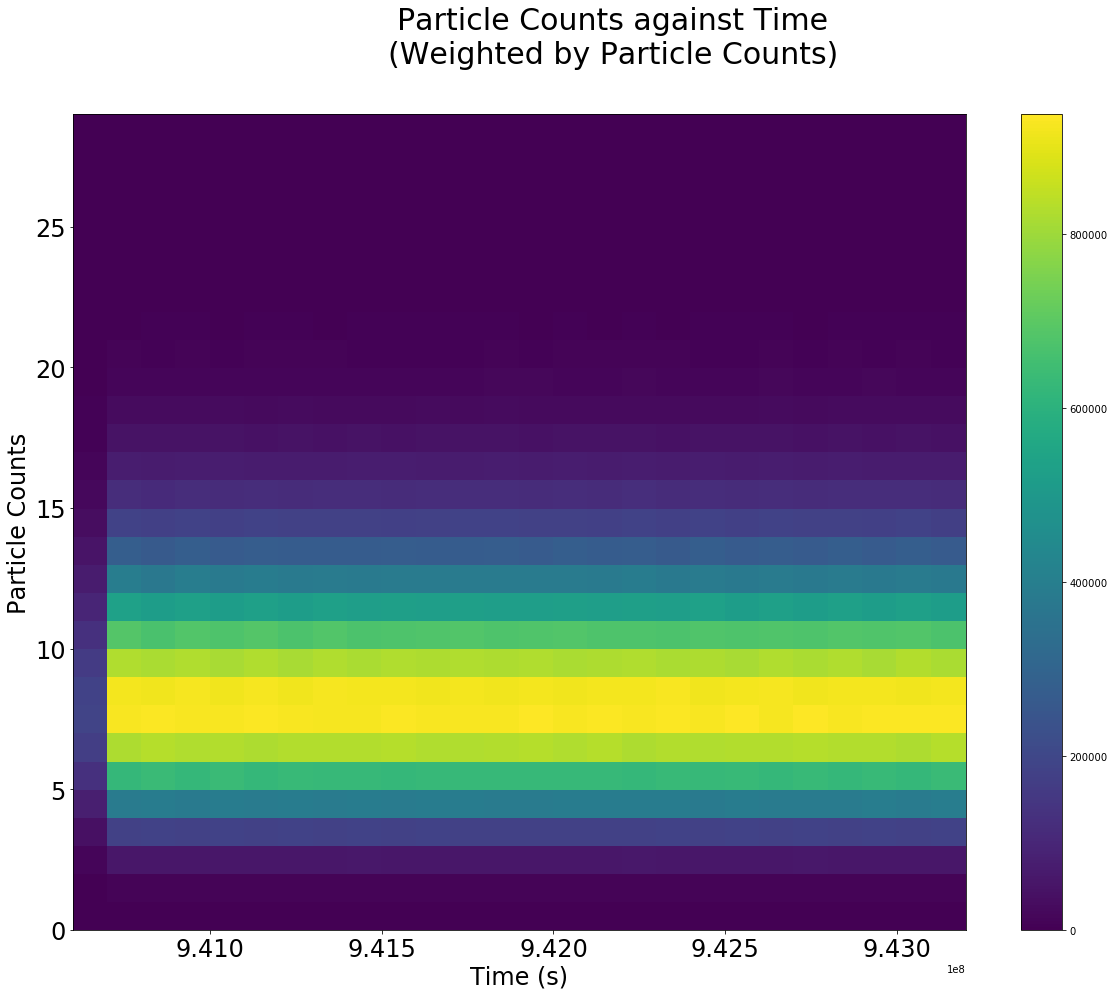

In [74]:
plt.suptitle('Particle Counts against Time\n(Weighted by Particle Counts)', fontsize=30)
plt.xlabel('Time (s)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(9.406e+8,9.433e+8, 0.001e+8)
biny = np.arange(0,30)
plt.hist2d(data[0,:], data[3,:],  bins = [binx, biny], weights = data[3,:])
plt.colorbar()

We can observe that most Particle counts are between 7-8 particles, constant and unrelated to time.

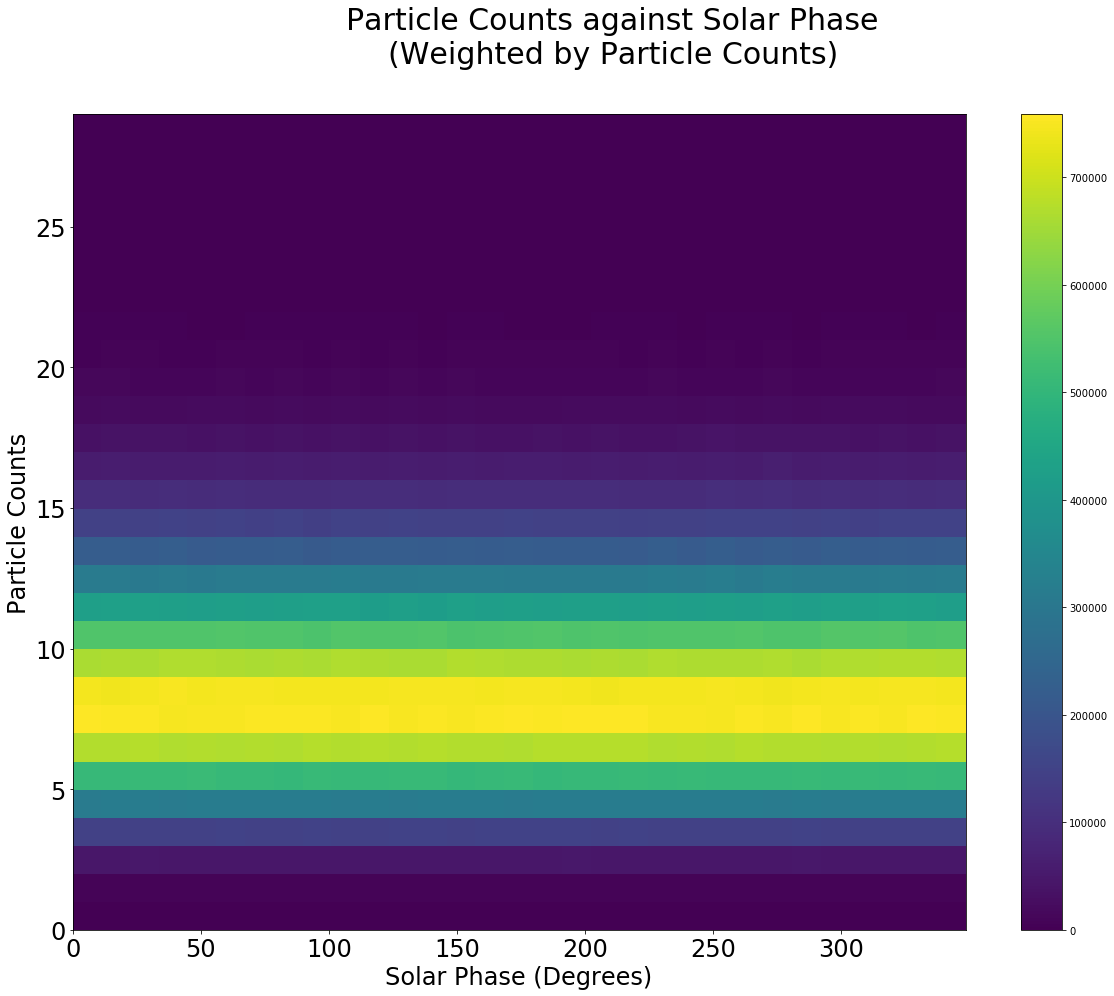

In [75]:
plt.suptitle('Particle Counts against Solar Phase\n(Weighted by Particle Counts)', fontsize=30)
plt.xlabel('Solar Phase (Degrees)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0, 360, 11.25)
biny = np.arange(0,30)
plt.hist2d(data[1,:], data[3,:],  bins = [binx, biny], weights = data[3,:])
plt.colorbar()

We can observe that most Particle counts are between 7-8 particles, constant and unrelated to Solar Phase.

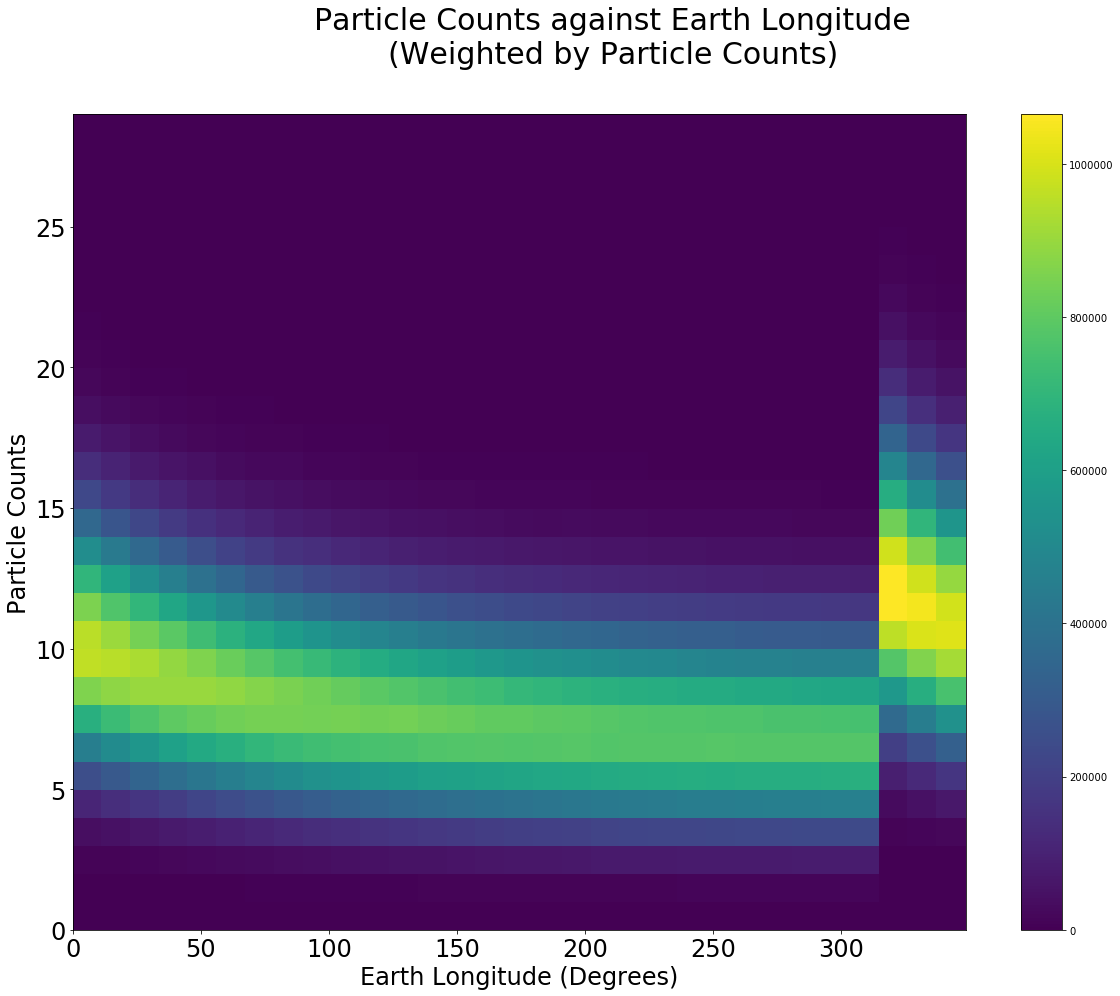

In [76]:
plt.suptitle('Particle Counts against Earth Longitude\n(Weighted by Particle Counts)', fontsize=30)
plt.xlabel('Earth Longitude (Degrees)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0, 360, 11.25)
biny = np.arange(0,30)
plt.hist2d(data[2,:], data[3,:],  bins = [binx, biny], weights = data[3,:])
plt.colorbar()

There seems to be a relationship between Paricle counts and Earth longitude.
<br> Between $-33.75^{\circ} <= \theta <= 326.25^{\circ}$ Particle count decreases with increasing Earth longitude. 

We've finished plotting the Particle Counts in 2D histograms.
Since we did not see bright bins except on or near the brightest line, we can conclude that:

While it's possible that outlier data may exist, they are not large enough in size so that they interfere with the trend of the data. 

[]

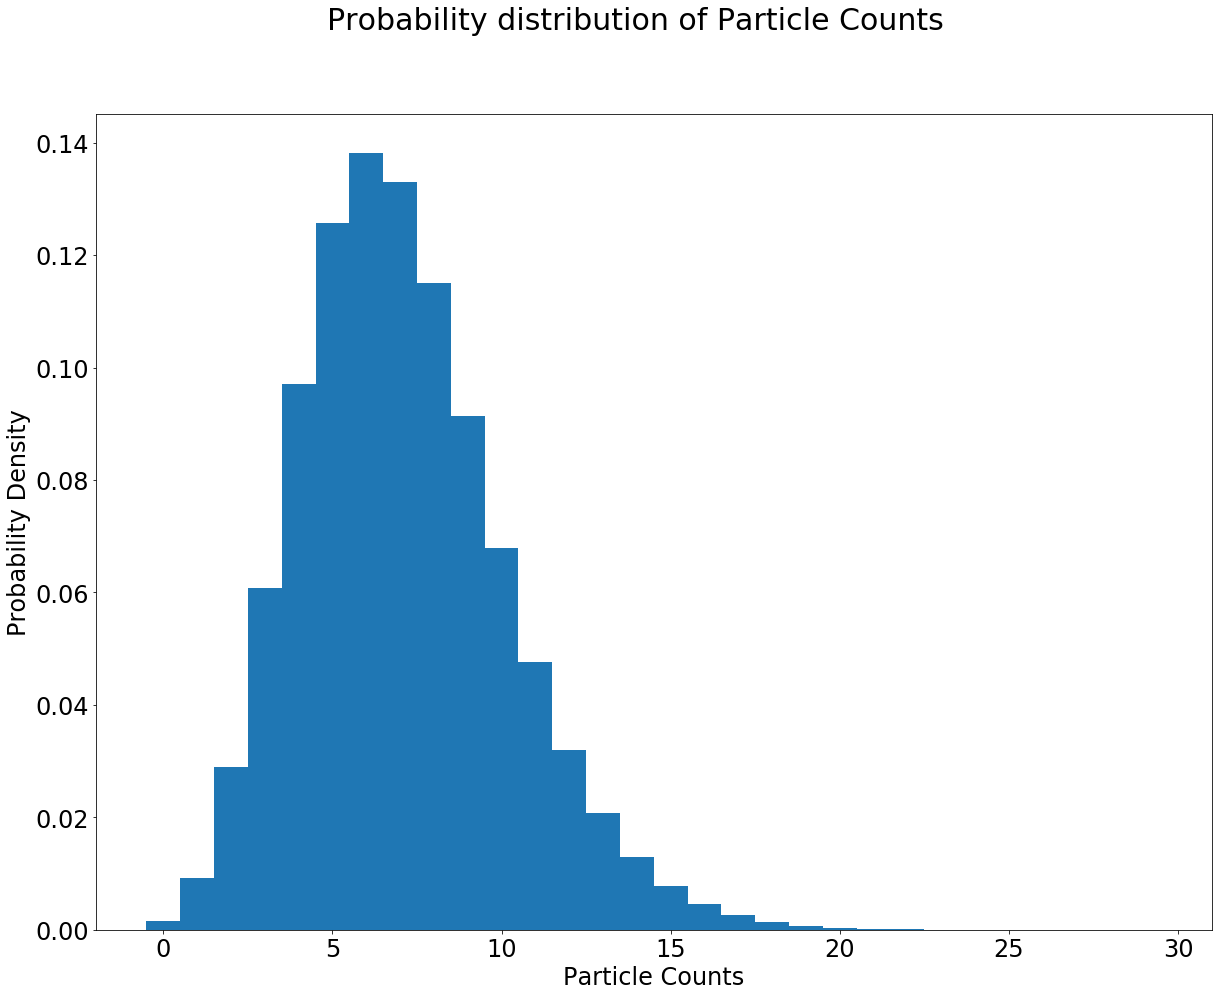

In [173]:
plt.suptitle('Probability distribution of Particle Counts', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(data[3,:], bins = np.arange(-0.5,30.5), density = True)
plt.plot()

[]

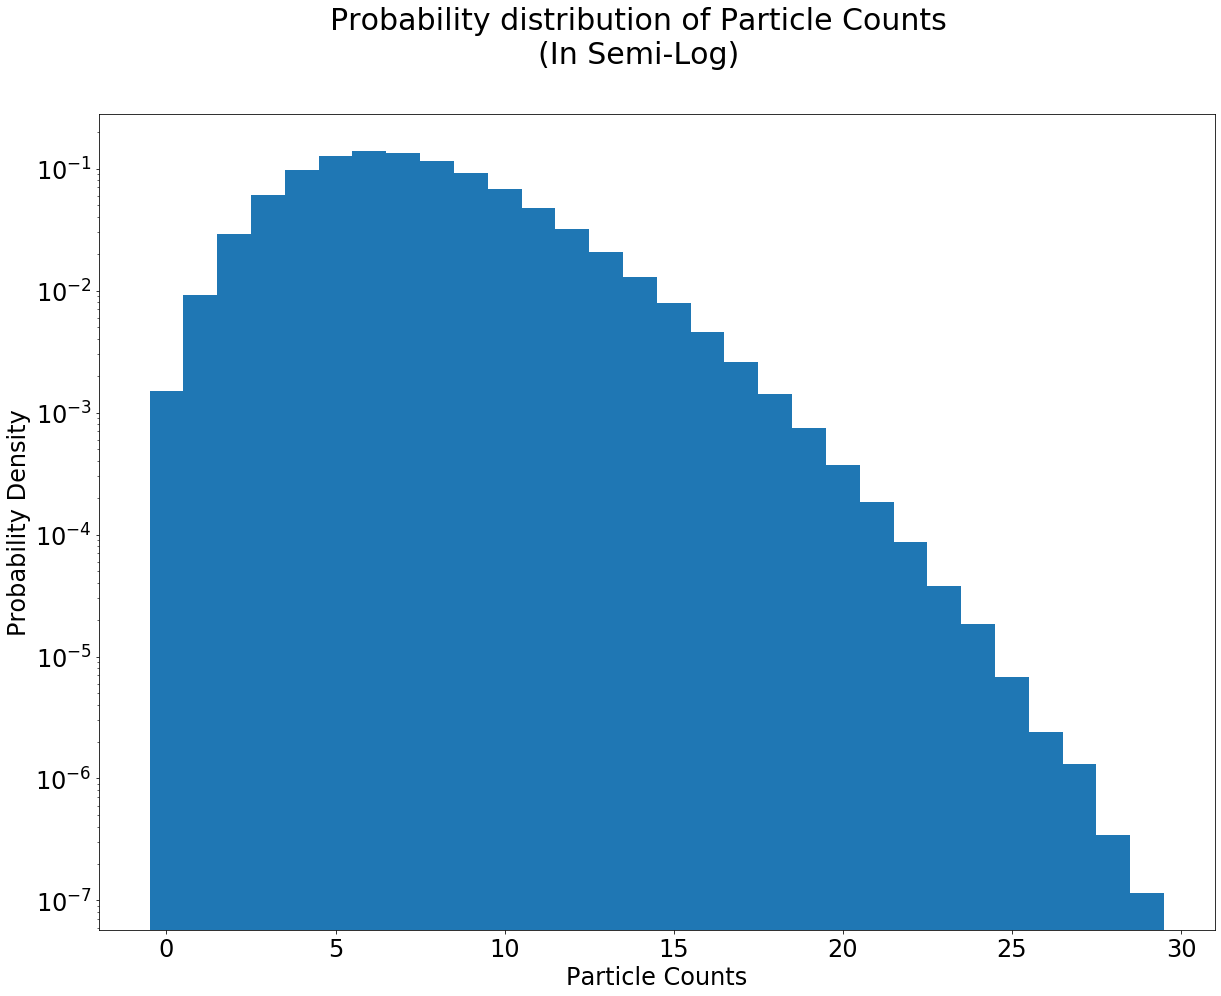

In [172]:
plt.suptitle('Probability distribution of Particle Counts\n(In Semi-Log)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(data[3,:], bins = np.arange(-0.5,30.5), density = True)
plt.plot()

The probability distribution of the Particle Counts appears to be a Poisson Distribution centered at 6.
<br> This would be a good choice to set as our background PDF.

To seek for contamination in the data, we will plot Particle Counts against the 3 parameters respectively, using a scatterplot.
<br>Due to the size of the data we're using every 1000th point.

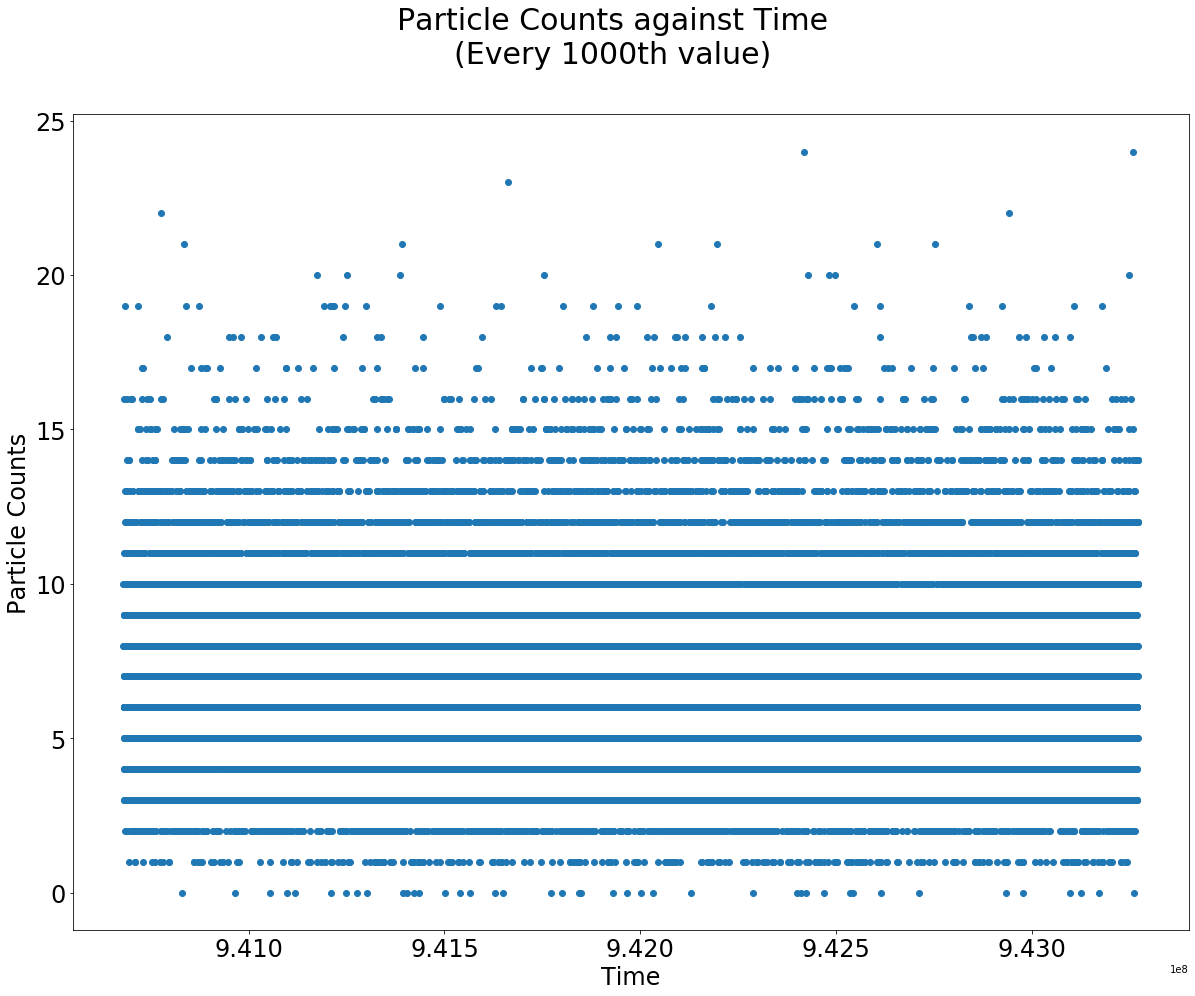

In [72]:
plt.suptitle('Particle Counts against Time\n(Every 1000th value)', fontsize=30)
plt.xlabel('Time', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data[0,0::1000], data[3,0::1000])

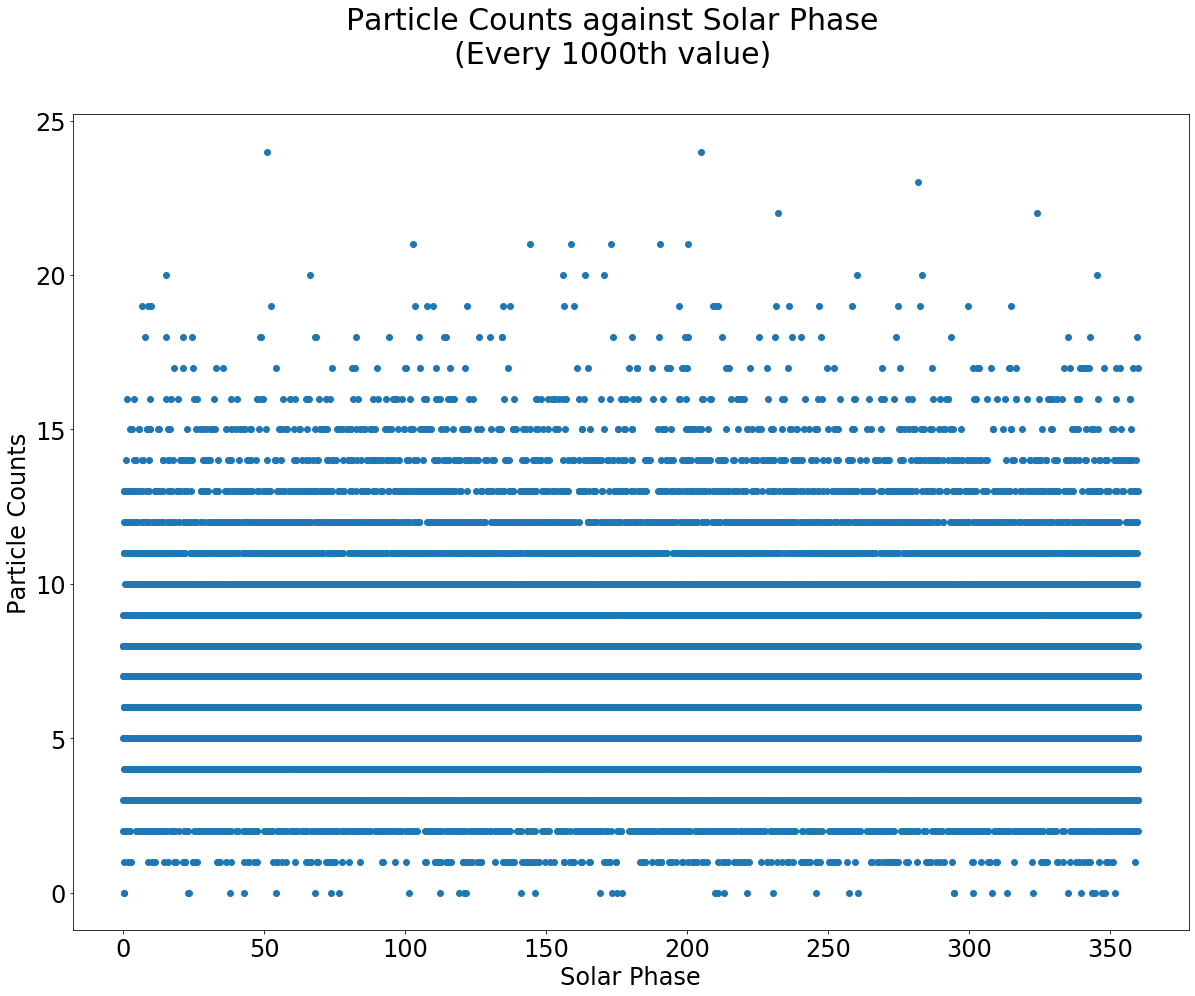

In [78]:
plt.suptitle('Particle Counts against Solar Phase\n(Every 1000th value)', fontsize=30)
plt.xlabel('Solar Phase', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data[1,0::1000], data[3,0::1000])

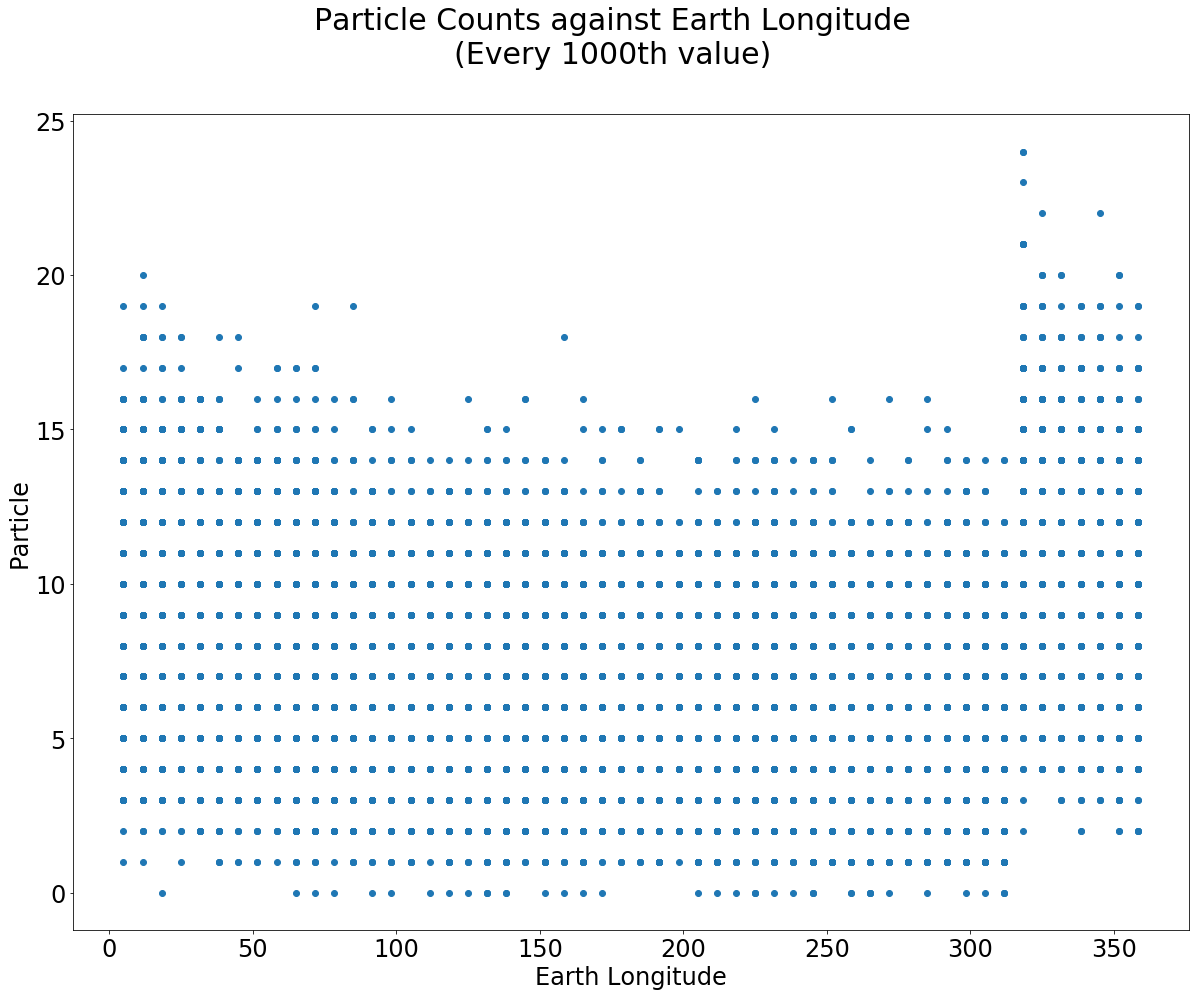

In [79]:
plt.suptitle('Particle Counts against Earth Longitude\n(Every 1000th value)', fontsize=30)
plt.xlabel('Earth Longitude', fontsize = 24)
plt.ylabel('Particle', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(data[2,0::1000], data[3,0::1000])

From the plots above, we're not seeing any 'extreme' outlier data that are far beyond the rest of the data.
<br>It's reasonable to suggest that we have few, if any, signal contamination.

## 2)

From the 2D histograms above, we see the average of particle is not consistent with respect to **Earth Longitude**.
<br>Thus, we will plot the probability distribution of Particle Count under the constraint of Earth Longitude. 

First of all, we separate the Earth Longitudes into bins of 11.25 ($\frac{360}{32}$)degrees, as we did in the 2d histogram.

In [180]:
bin_el = np.arange(0, 360, 360/32)
bin_el
#digit_el = np.digitize(data[2,:], bin_el)
#len(bin_el)

array([  0.  ,  11.25,  22.5 ,  33.75,  45.  ,  56.25,  67.5 ,  78.75,
        90.  , 101.25, 112.5 , 123.75, 135.  , 146.25, 157.5 , 168.75,
       180.  , 191.25, 202.5 , 213.75, 225.  , 236.25, 247.5 , 258.75,
       270.  , 281.25, 292.5 , 303.75, 315.  , 326.25, 337.5 , 348.75])

We'll plot some extreme ends first.
In the 2D histogram, at Earth Longitude between 326.25 and 337.5 degrees (Bin #30), most of the Particle Count is 12.
<br>We shall plot a histogram for all data entries that fall into bin #30, as well as calculate the average of the all the Particle Counts in that bin.

In [187]:
earth_longitude = data[2,:]
indices = np.intersect1d(np.where(326.25 <= earth_longitude), np.where(337.5 >= earth_longitude))

In [188]:
selected = data[3,:][indices]
selected

array([14.,  6., 11., ...,  8., 11., 14.])

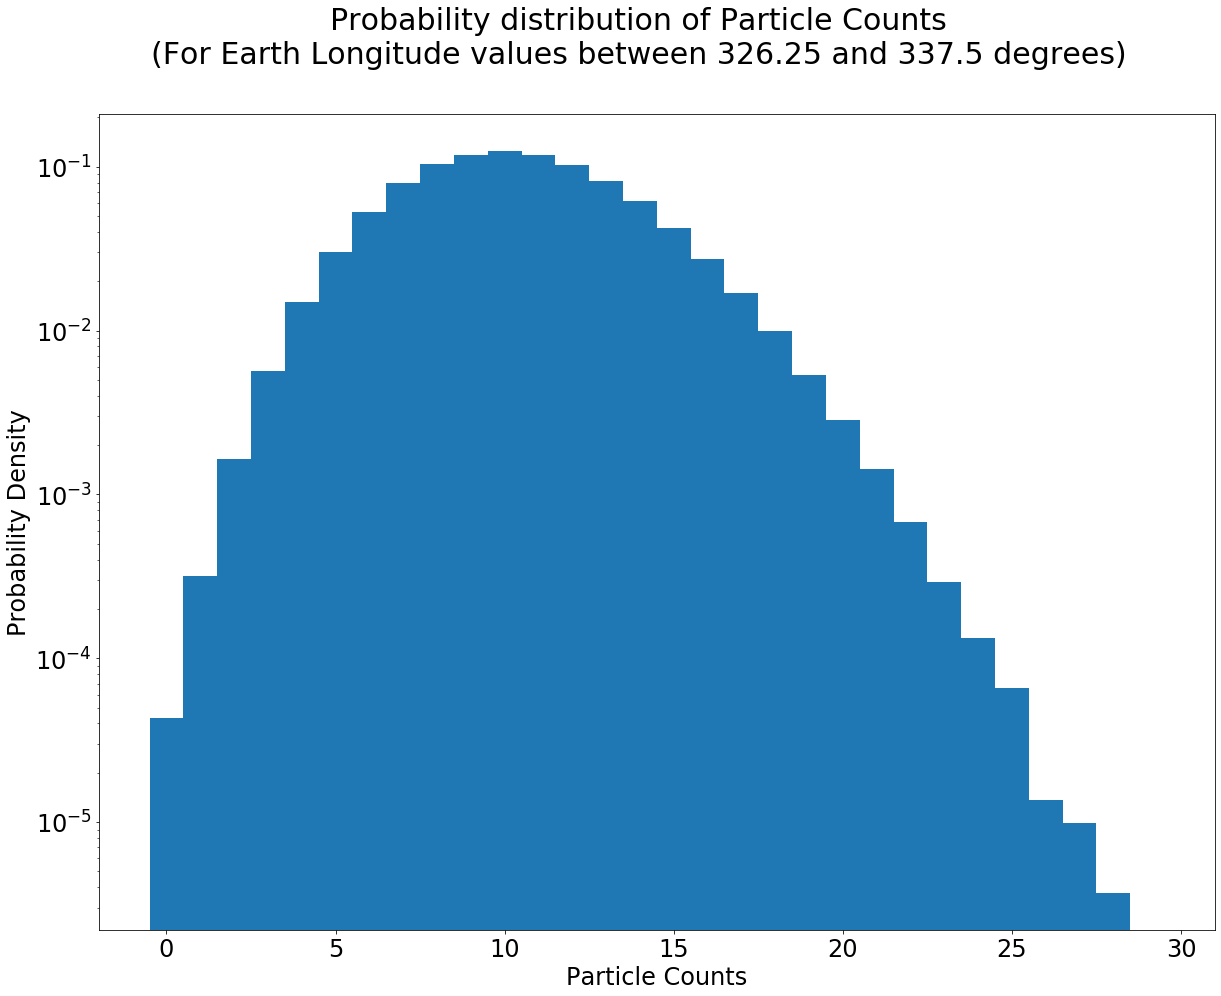

The mean is 10.422722896919431.


In [189]:
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between 326.25 and 337.5 degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

We can clearly see that for this range of Earth Longitude, we still have a distribution that looks like Poisson distribution,
<br>but the distribution now has the average 10.42 instead of 6.

Next, we will do the same for some other bins for Earth Longitude.

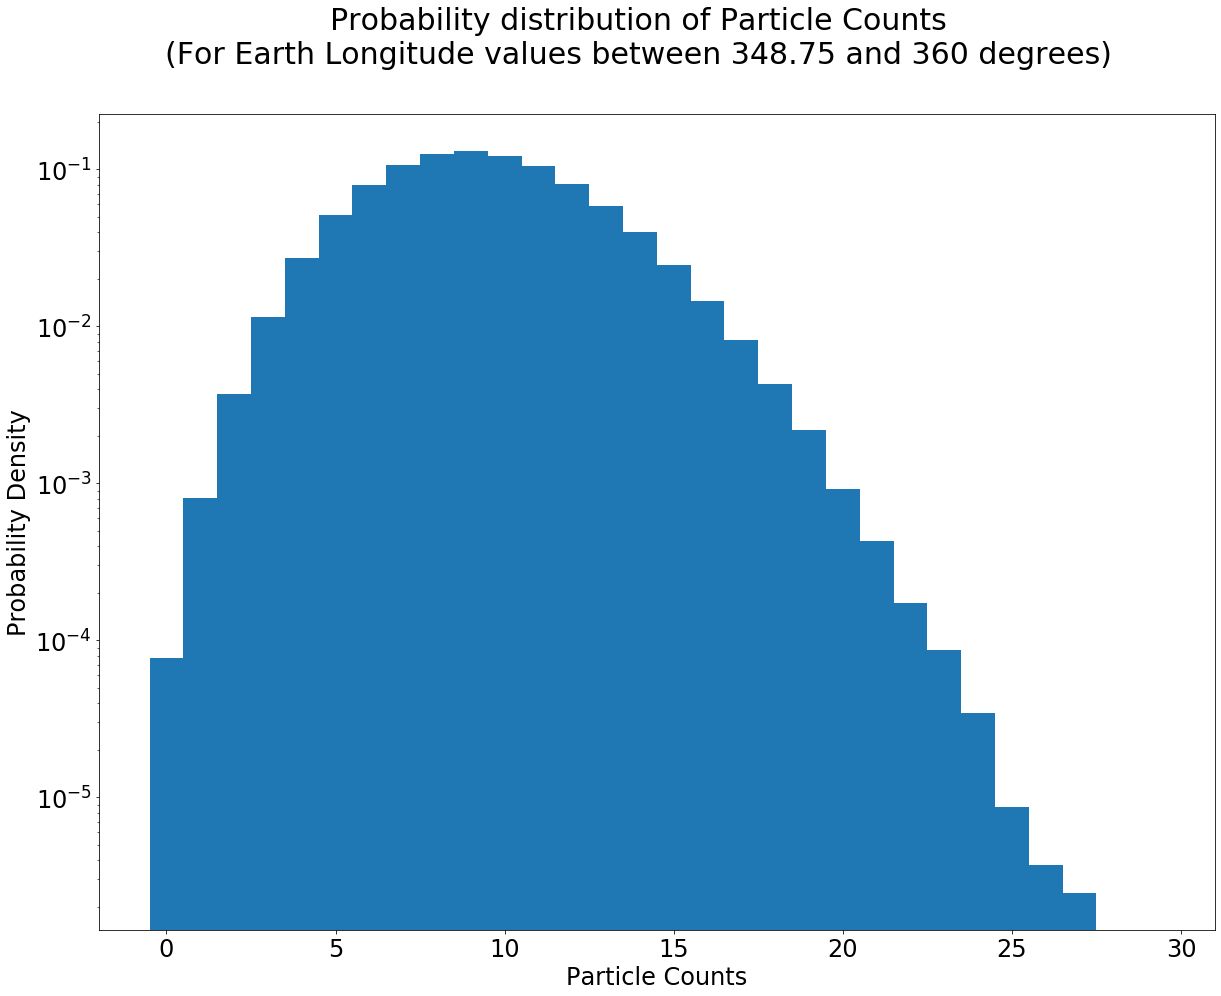

The mean is 9.380700454455642.


In [190]:
indices = np.intersect1d(np.where(348.75 <= data[2,:]), np.where(360 >= data[2,:]))
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between 348.75 and 360 degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

When we increase our Earth Longitude to between 348.75 and 360, the average drops to 9.38.

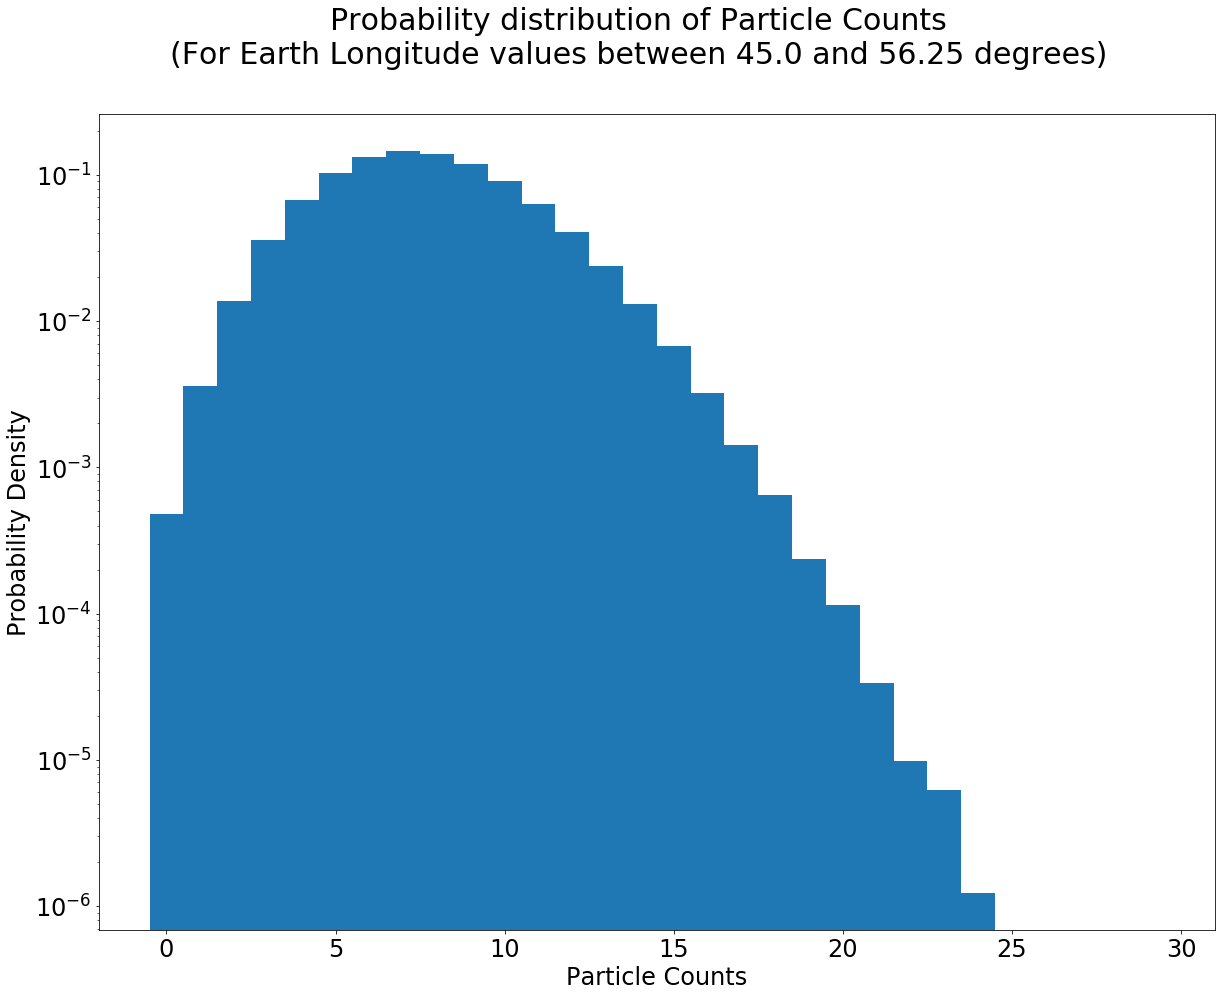

The mean is 7.671508847367635.


In [191]:
indices = np.intersect1d(np.where(11.25 * 4 <= data[2,:]), np.where(11.25 * 5 >= data[2,:]))
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between ' + str(11.25 * 4) + ' and ' + str(11.25 * 5) + ' degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

When we increase our Earth Longitude to between 45 and 56.25, the average drops to 7.67.

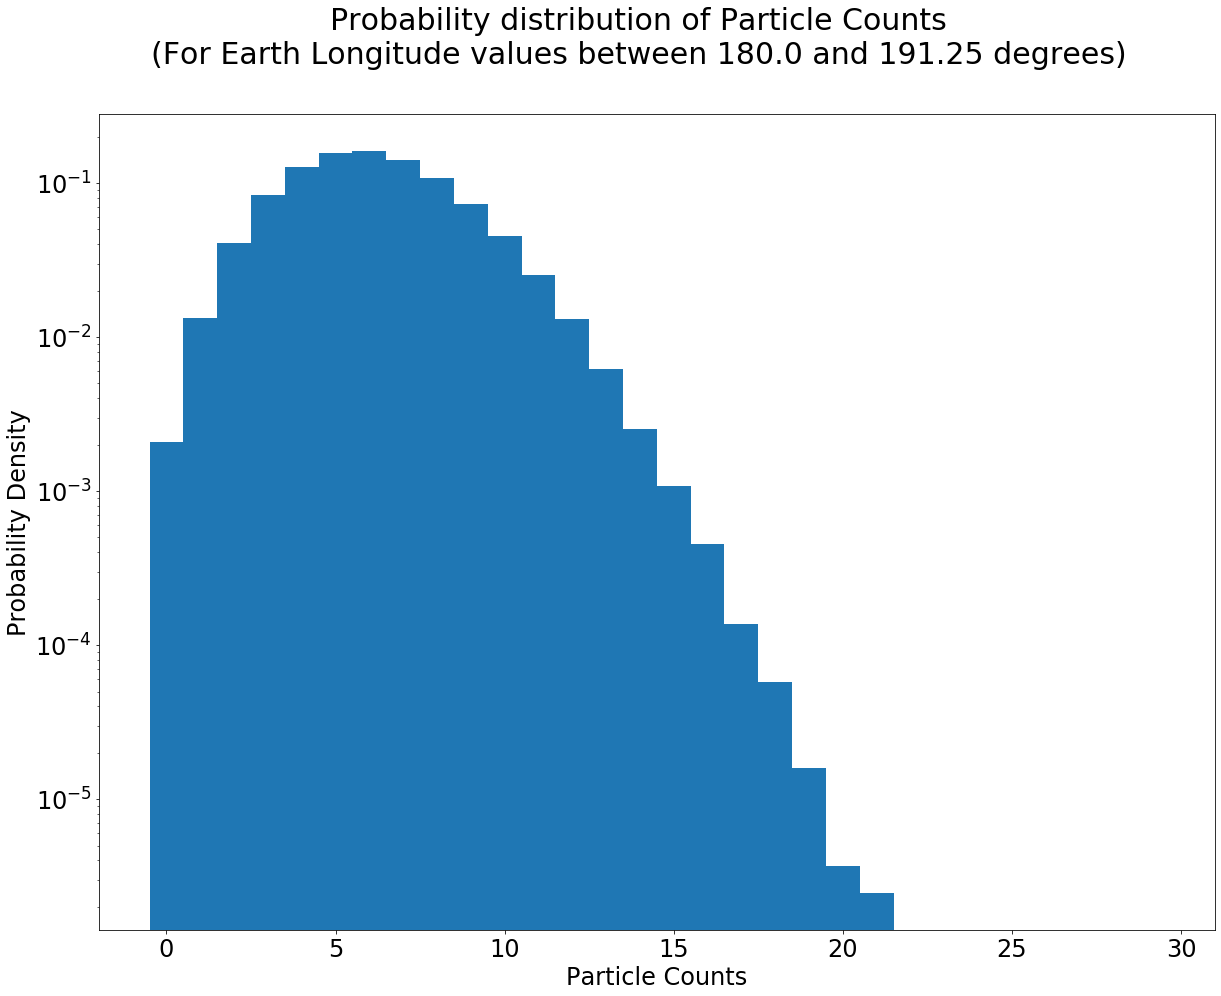

The mean is 6.137641933254344.


In [192]:
indices = np.intersect1d(np.where(11.25 * 16 <= data[2,:]), np.where(11.25 * 17 >= data[2,:]))
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between ' + str(11.25 * 16) + ' and ' + str(11.25 * 17) + ' degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

When we increase our Earth Longitude to between 180 and 191.25, the average drops to 6.13, which is roughly the same as the mean for the histogram over all data.

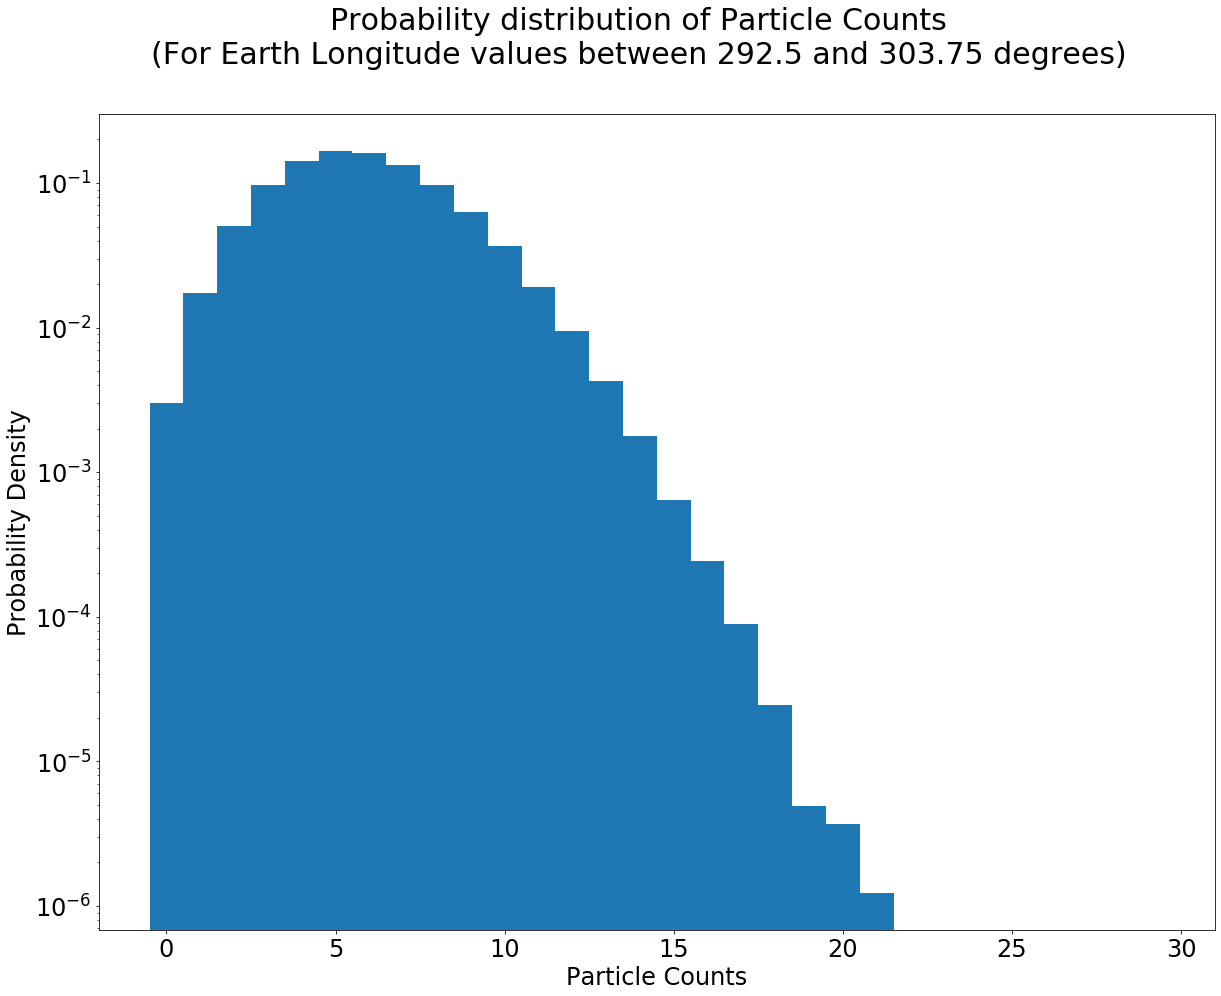

The mean is 5.8248827507898895.


In [226]:
indices = np.intersect1d(np.where(11.25 * 26 <= data[2,:]), np.where(11.25 * 27 >= data[2,:]))
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(For Earth Longitude values between ' + str(11.25 * 26) + ' and ' + str(11.25 * 27) + ' degrees)', fontsize=30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()
print("The mean is " + str(np.mean(selected)) + "." )

When we increase our Earth Longitude to between 292.5 and 303.75. the average drops to 5.82, which is about the same as the overall histogram.
<br>**With Earth Longitude changing, the background maintains a Poisson distribution shape, with its mean changing with different Earth Longitude.**
<br>This makes sense with our overall background being a Poisson distribution, because sums of Poisson distributions (for every range of Earth Longitude) is a Poisson distribution.

The mean of the background changes exactly as we've guessed from the 2D histogram:
<br> It decreases like an exponential from -33.75 degrees to 326.25 degrees, decreasing quickly at first but gradually come to a halt.

To get a more overall understanding of the mean of Particle Counts against Earth Longitude, we shall plot the mean for every bin.

In [267]:
binx

array([  0.  ,  11.25,  22.5 ,  33.75,  45.  ,  56.25,  67.5 ,  78.75,
        90.  , 101.25, 112.5 , 123.75, 135.  , 146.25, 157.5 , 168.75,
       180.  , 191.25, 202.5 , 213.75, 225.  , 236.25, 247.5 , 258.75,
       270.  , 281.25, 292.5 , 303.75, 315.  , 326.25, 337.5 , 348.75])

In [268]:
diff = binx[1] - binx[0]
diff

11.25

In [273]:
means = np.zeros(len(binx))
for i in np.arange(len(binx)):
    indices = np.intersect1d(np.where(diff * i <= data[2,:]), np.where(diff * (i+1) >= data[2,:]))
    selected = data[3,:][indices]
    means[i] =  np.mean(selected)
means

array([ 8.94845478,  8.57179107,  8.22894204,  7.93480335,  7.67150885,
        7.4432773 ,  7.22723391,  7.05088122,  6.89308847,  6.75323855,
        6.62855697,  6.5204606 ,  6.42372383,  6.34080026,  6.26213221,
        6.19647388,  6.13764193,  6.08594367,  6.04073978,  6.00358536,
        5.96611621,  5.92960111,  5.90901338,  5.88328397,  5.86293197,
        5.84516069,  5.82488275,  5.81327878, 11.04953964, 10.4227229 ,
        9.86496347,  9.38070045])

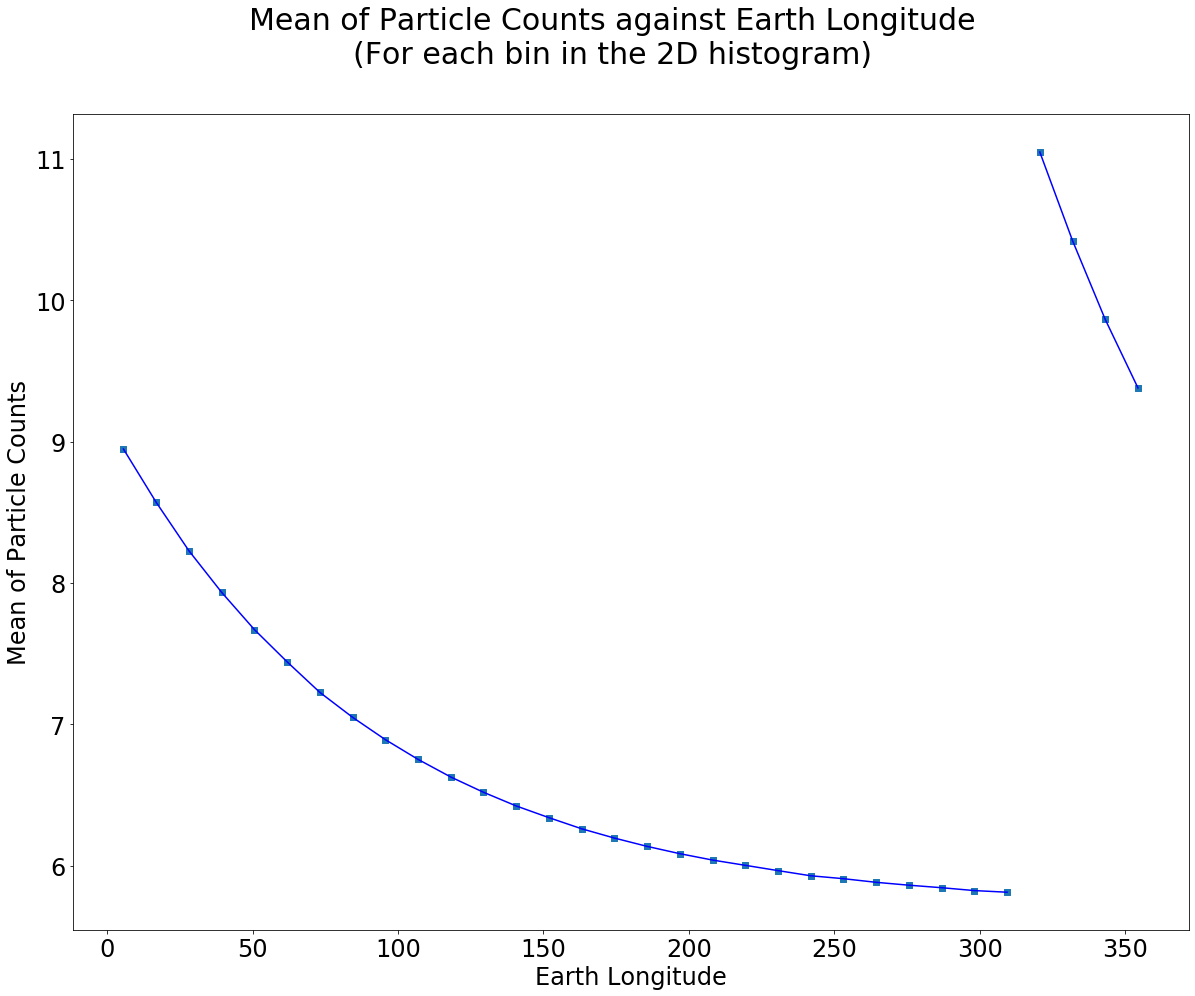

In [291]:
plt.suptitle('Mean of Particle Counts against Earth Longitude\n(For each bin in the 2D histogram)', fontsize=30)
plt.xlabel('Earth Longitude', fontsize = 24)
plt.ylabel('Mean of Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(binx + diff/2, means, marker = 's')
plt.plot(binx[0:28] + diff/2, means[0:28], 'b')
plt.plot(binx[28:] + diff/2, means[28:], 'b')
plt.show()

### **It appears that the means of Particle Count goes like a *decreasing exponential* with respect to Earth Longitude,<br>especially if we consider Earth longitude larger than 32625 as negative angles.**

[  5.625  16.875  28.125  39.375  50.625  61.875  73.125  84.375  95.625
 106.875 118.125 129.375 140.625 151.875 163.125 174.375 185.625 196.875
 208.125 219.375 230.625 241.875 253.125 264.375 275.625 286.875 298.125
 309.375 320.625 331.875 343.125 354.375   5.625]


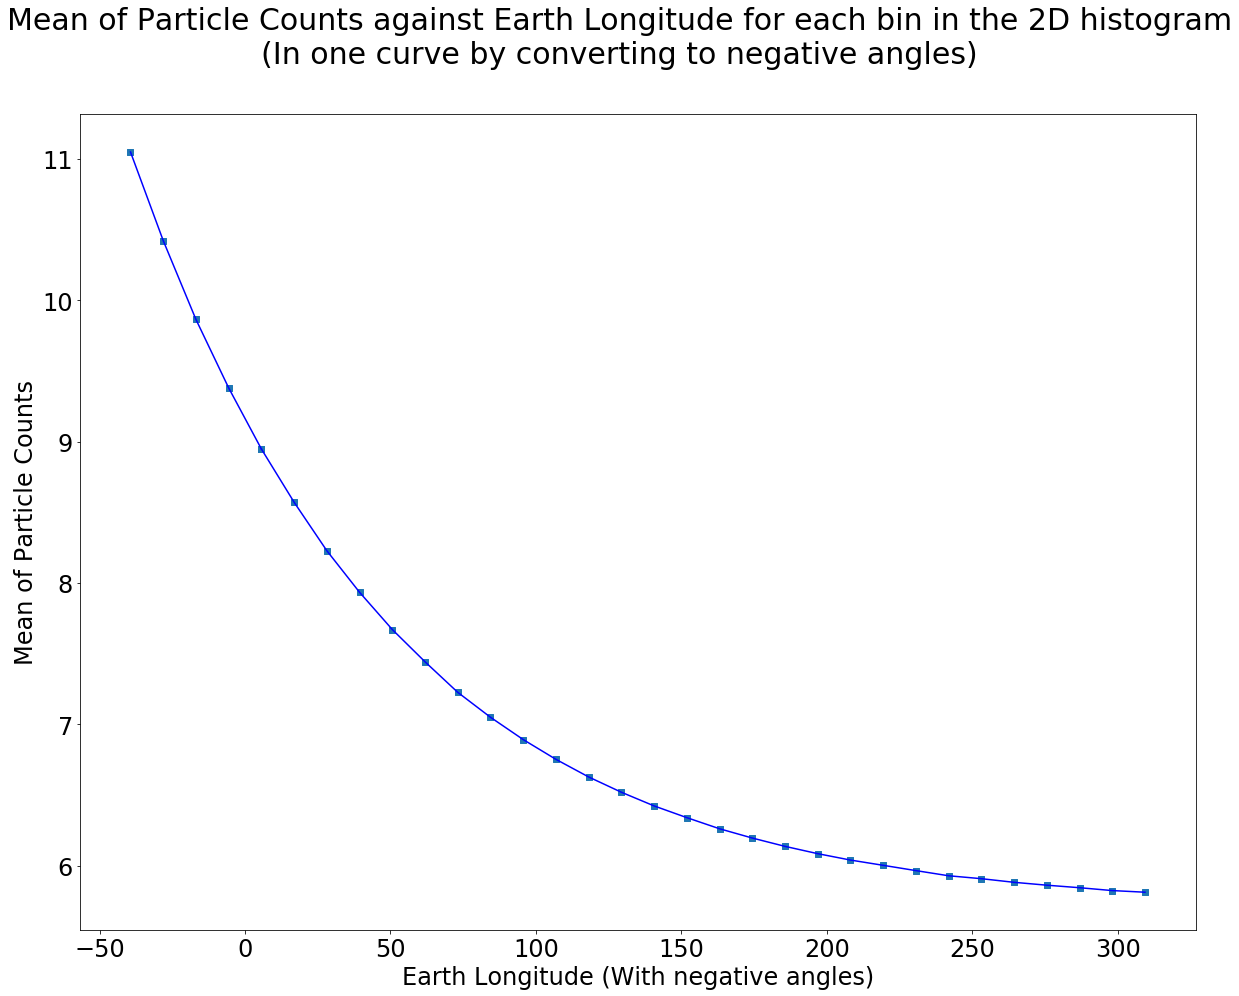

In [314]:
plt.suptitle('Mean of Particle Counts against Earth Longitude for each bin in the 2D histogram\n(In one curve by converting to negative angles)', fontsize=30)
plt.xlabel('Earth Longitude (With negative angles)', fontsize = 24)
plt.ylabel('Mean of Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
meansp = np.append(means, means[0])
bin_neg = np.append(binx + diff/2, binx[0] + diff/2)
print(bin_neg)
for i in np.arange(len(binx)):
    if bin_neg[i] > 320:
        bin_neg[i] -= 360
plt.scatter(bin_neg, meansp, marker = 's')
plt.plot(bin_neg[0:28], meansp[0:28], 'b')
plt.plot(bin_neg[28:], meansp[28:], 'b')
plt.show()

Next, we will plot the means along with the original 2D hist:

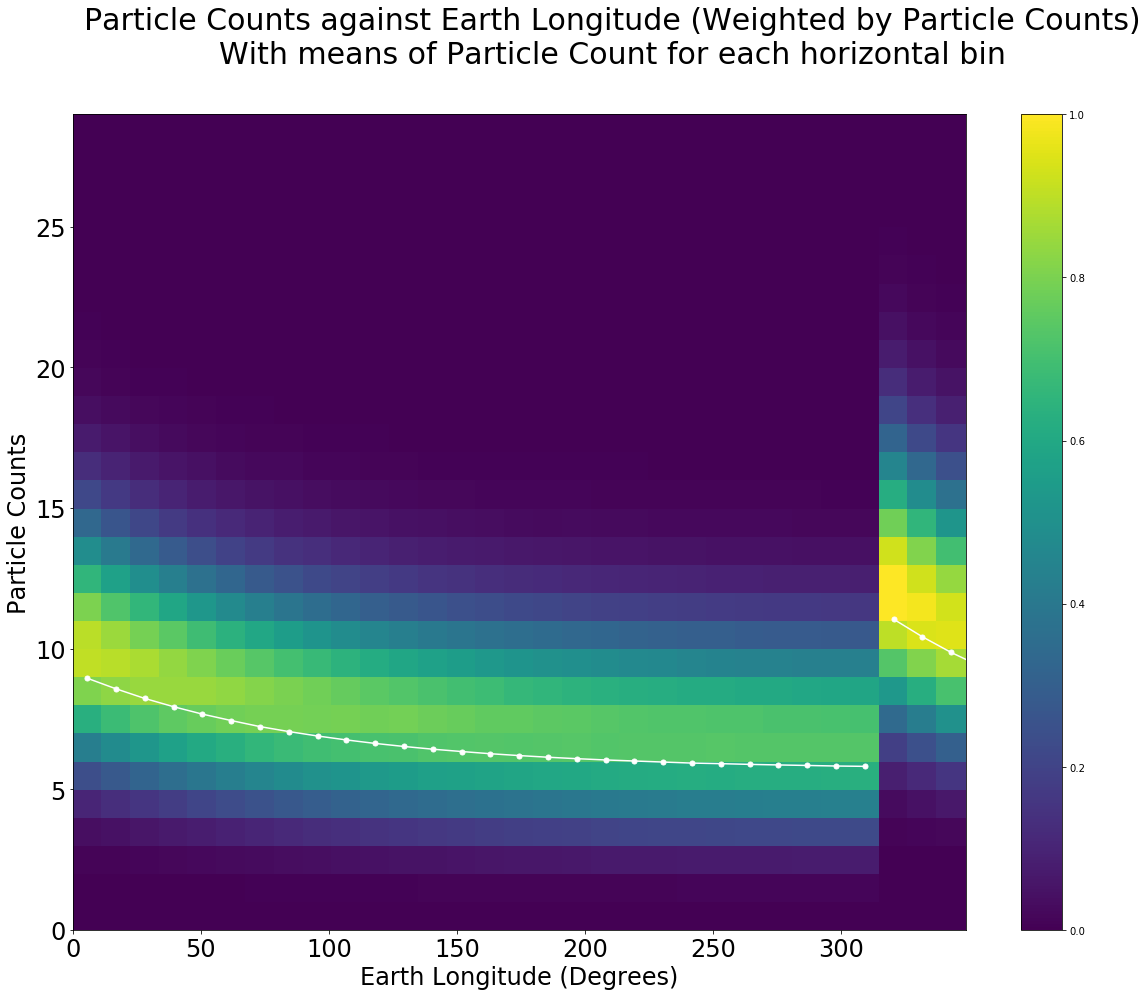

In [357]:
plt.suptitle('Particle Counts against Earth Longitude (Weighted by Particle Counts)\nWith means of Particle Count for each horizontal bin', fontsize=30)
plt.xlabel('Earth Longitude (Degrees)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0, 360, 11.25)
biny = np.arange(0,30)
plt.hist2d(data[2,:], data[3,:],  bins = [binx, biny], weights = data[3,:])
plt.scatter(binx + diff/2, means, s = 25, c = 'w', marker = 'o')
plt.plot(binx[0:28] + diff/2, means[0:28], 'w')
plt.plot(binx[28:] + diff/2, means[28:], 'w')
plt.colorbar()

It appears that our means for Particle Counts match rather well with the 2D histogram's most populated bins.

## In conclusion:
### By seeing angles greater than around 326.25 degrees as negative angles ($\theta - 360$), the background changes by the mean of the distribution (Poisson) decreases exponentially with increasing Earth longitude.


## 3)


While Particle Counts appears to be independent of time over the entire 2D histogram,
<br>Earth Longitude, which Particle Counts is dependent on, is actually peroidically dependent on time.

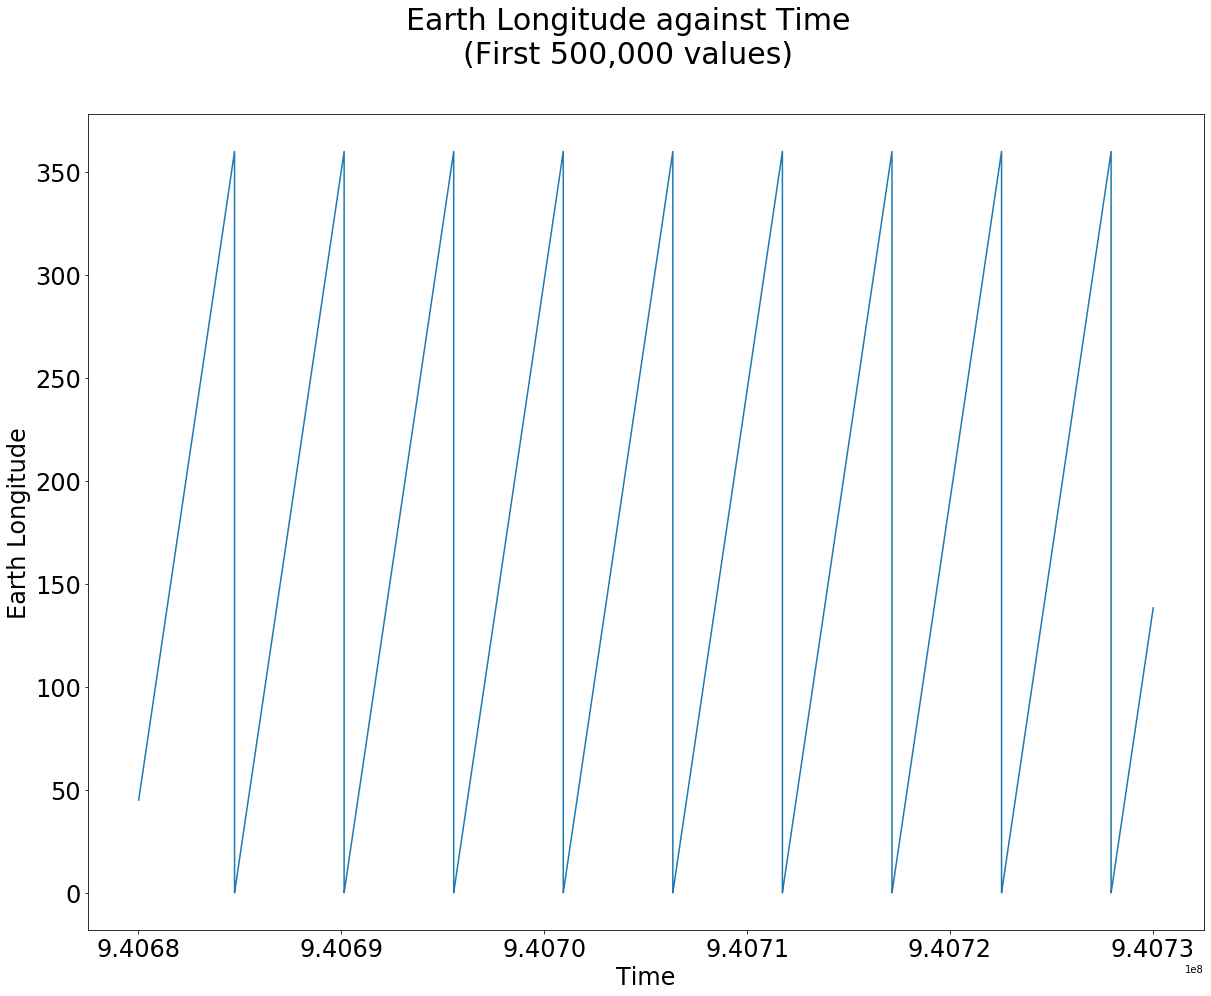

In [9]:
plt.suptitle('Earth Longitude against Time\n(First 500,000 values)', fontsize=30)
plt.xlabel('Time', fontsize = 24)
plt.ylabel('Earth Longitude', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.plot(data[0,0:500000], data[2,0:500000])
plt.show()

In [340]:
data[2,0]

45.0

The Satellite's first data is collected at 45degrees. After going through an entire cycle around the globe, Earth Longitude gets back to 45.
<br>We should be able to know the peroid by finding the indicies where Earth Longitude is 45 degrees, then finding difference in time.

In [10]:
long = data[2,:]
indices = np.where(long == 45)
time_reset = data[0, :][indices]
time_reset
peroid = np.zeros(len(time_reset) - 1)
for i in np.arange(len(time_reset) - 1):
    peroid[i] = time_reset[i + 1] - time_reset[i]
peroid

array([5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400., 5400.,
       5400., 5400.,

It appears our peroid is 5400 seconds.
<br>(It takes the Satellite 5400 seconds to orbit the earth once)
<br>Thus, we can just fold the data by a peroid of 54,000 seconds because the rest of the data repeats peroidically.

In [11]:
time_fold = (data[0,:] - data[0,0]) % 5400

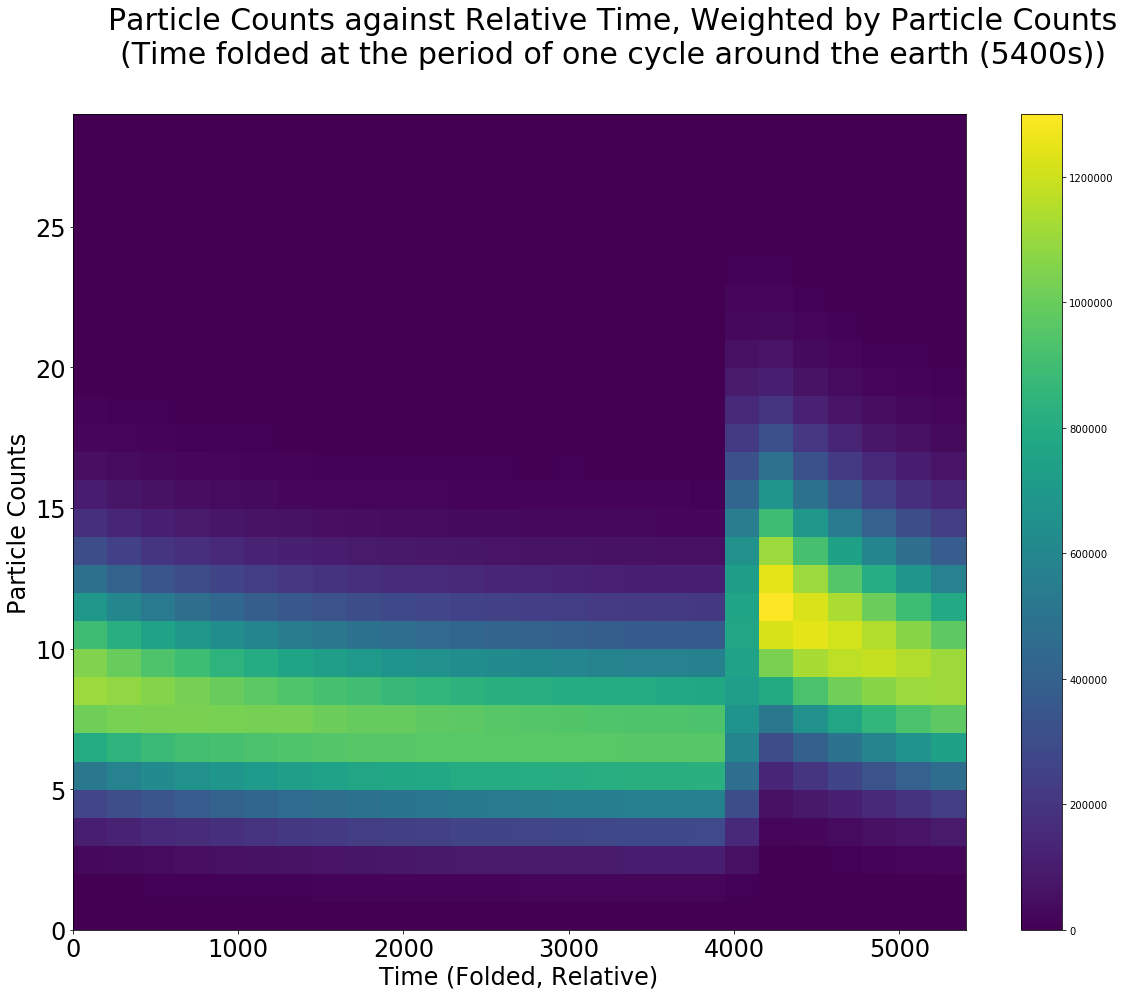

In [12]:
plt.suptitle('Particle Counts against Relative Time, Weighted by Particle Counts\n(Time folded at the period of one cycle around the earth (5400s))', fontsize=30)
plt.xlabel('Time (Folded, Relative)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.linspace(0, 5400, 27)
biny = np.arange(0,30)
plt.hist2d(time_fold, data[3,:],  bins = [binx, biny], weights = data[3,:])
plt.colorbar()
plt.show()

Let's check if our data still look like the Poisson distribution.
<br>We'll check by plotting the histogram of all Particle distribution at the start of the peroid (Folded relative time = 0.0s)

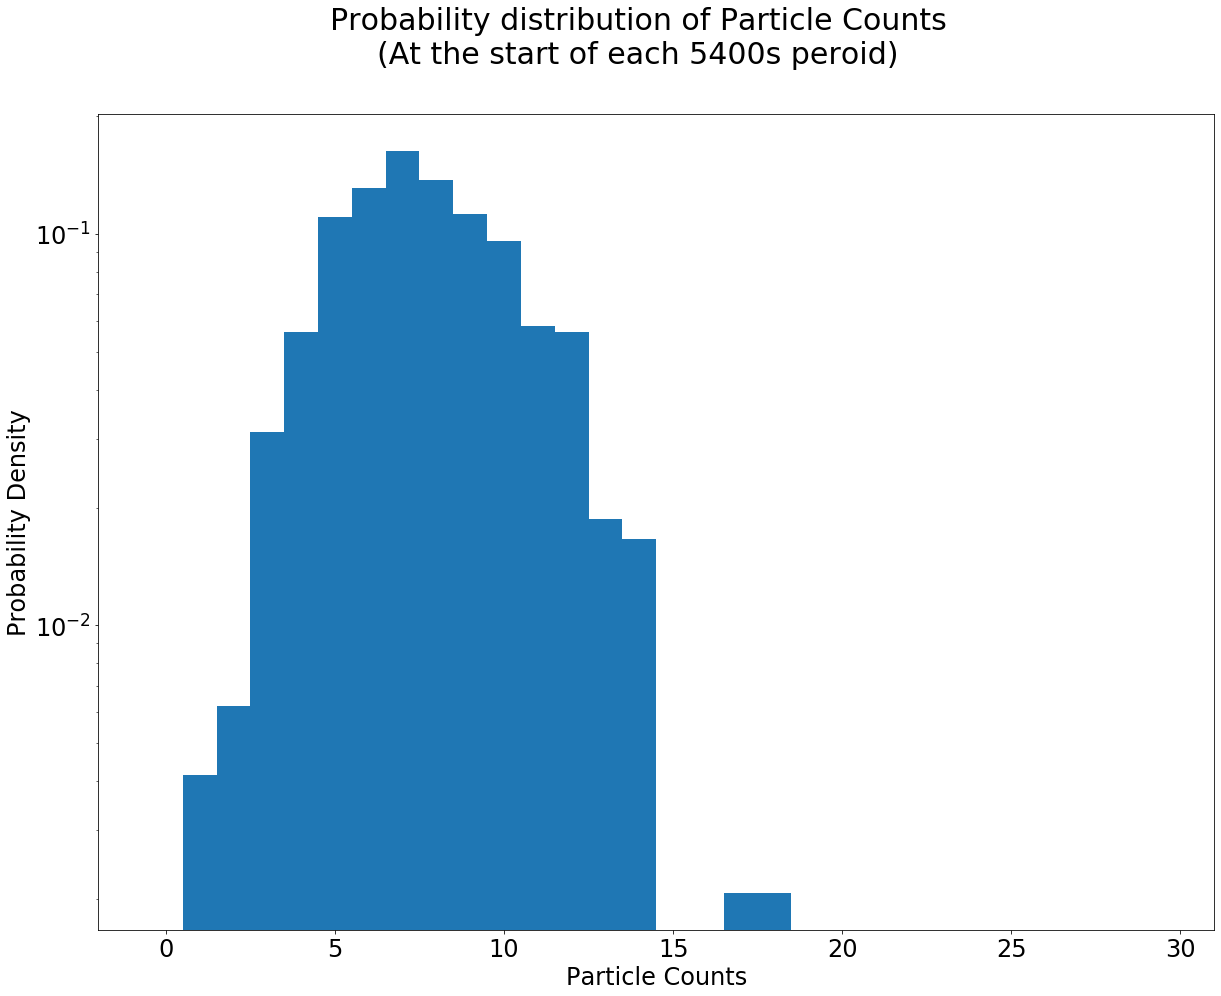

In [13]:
# Since data is peroidical, we know that every 54000th data has folded relative time = 0.0s
indices = np.arange(0,len(time_fold),54000)
selected = data[3,:][indices]
plt.suptitle('Probability distribution of Particle Counts\n(At the start of each 5400s peroid)', fontsize = 30)
plt.xlabel('Particle Counts', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(selected, bins = np.arange(-0.5,30.5), density = True)
plt.show()

We can see that although there are a few outliers, the general shape of the distribution is still close to that of a Poisson.

**Since the mean is the only parameter for the Poisson distribution,<br>and as we worked out previously,the mean is dependent on Longitude.** 

**Thus within a single peroid, mean is dependent on Time.** 

## We shall find the mean to each step in folded time, and that mean will be the mean for our time-dependent Poisson distribution.

In [14]:
means = np.zeros(54000)
for i in np.arange(0,54000):
    indices = np.arange(i,len(time_fold),54000)
    selected = data[3,:][indices]
    means[i] =  np.mean(selected)
means

array([7.73388773, 7.78541667, 7.86875   , ..., 7.57916667, 7.64166667,
       7.88333333])

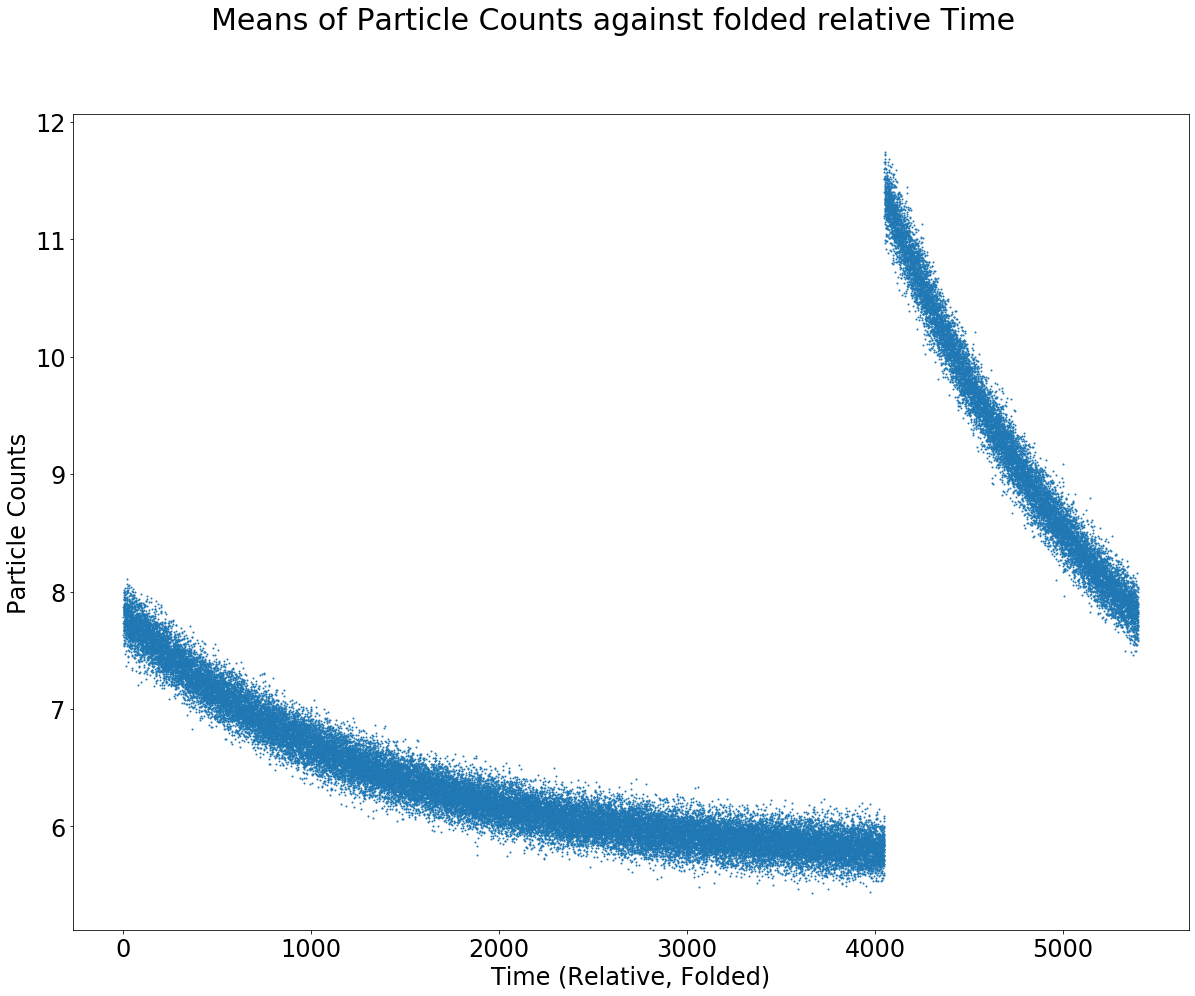

In [15]:
plt.suptitle('Means of Particle Counts against folded relative Time', fontsize = 30)
plt.xlabel('Time (Relative, Folded)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(time_fold[0:54000], means, s = 1)
plt.show()

We can see the trend of the data clearly, but we would want to shift the start of the peroid so we could see a uniform decreasing exponential.

In [16]:
for i in np.arange(len(means) - 1):
    # From the graph, it appears that no two adjacent points have a separation greater than two aside from the jump.
    if means[i + 1] - means [i] > 3:
        print(i + 1)
        new_start = i + 1

40500


In [98]:
5400 - 4050

1350

At the 40500th entry (Or time 4050s), the mean jumps from around 6 to around 11.5.
<br>We will replot the above plot after shifting right 1350 seconds.

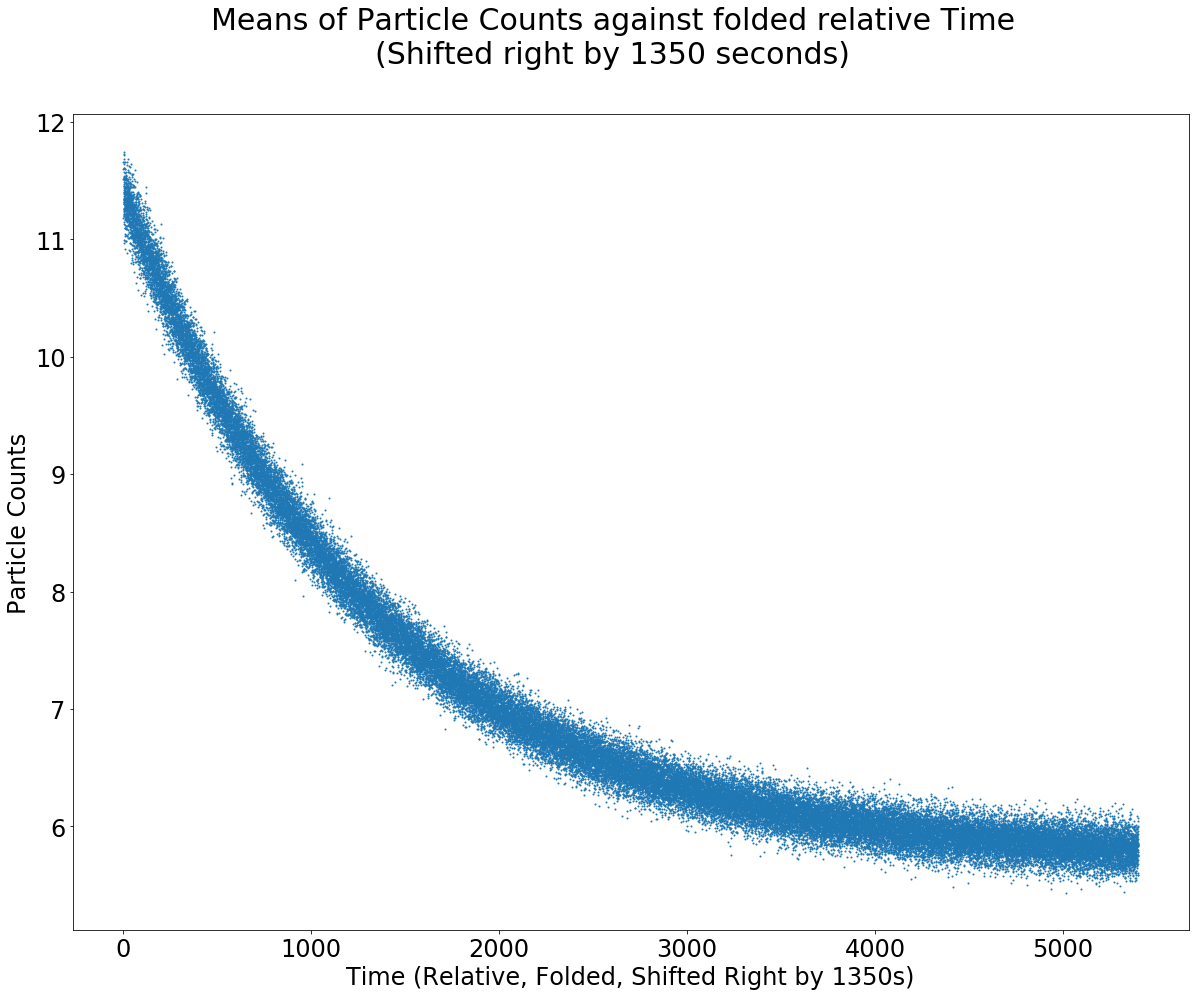

In [101]:
plt.suptitle('Means of Particle Counts against folded relative Time\n(Shifted right by 1350 seconds)', fontsize = 30)
plt.xlabel('Time (Relative, Folded, Shifted Right by 1350s)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
means_shift = np.append(means[40500:], means[0:40500])
plt.scatter(time_fold[0:54000], means_shift, s = 1)
plt.show()

We should be able to find an exponential fit with the above data.
<br>The shape of the graph suggest it looks like a decaying exponential centered at x=5400.
<br>$y=ae^{b(t-5400)} + c$

By experimenting, we made the initial guess of a = 0.01, b = -0.001, c = 5.5.

In [130]:
fit = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(b*(t-5400)) + c, time_fold[0:54000], means_shift, p0 =(0.01, -0.001, 5.5))
fit

(array([ 1.04763330e-01, -7.39907316e-04,  5.69832044e+00]),
 array([[ 1.51079991e-07,  2.71390164e-10, -4.41951069e-07],
        [ 2.71390164e-10,  4.92167883e-13, -7.66836057e-10],
        [-4.41951069e-07, -7.66836057e-10,  1.72354087e-06]]))

This gives us the fit $y=0.105 * e^{-0.00740(t-5400)} + 5.70$

Let's see how it looks like with our mean scatterplot:

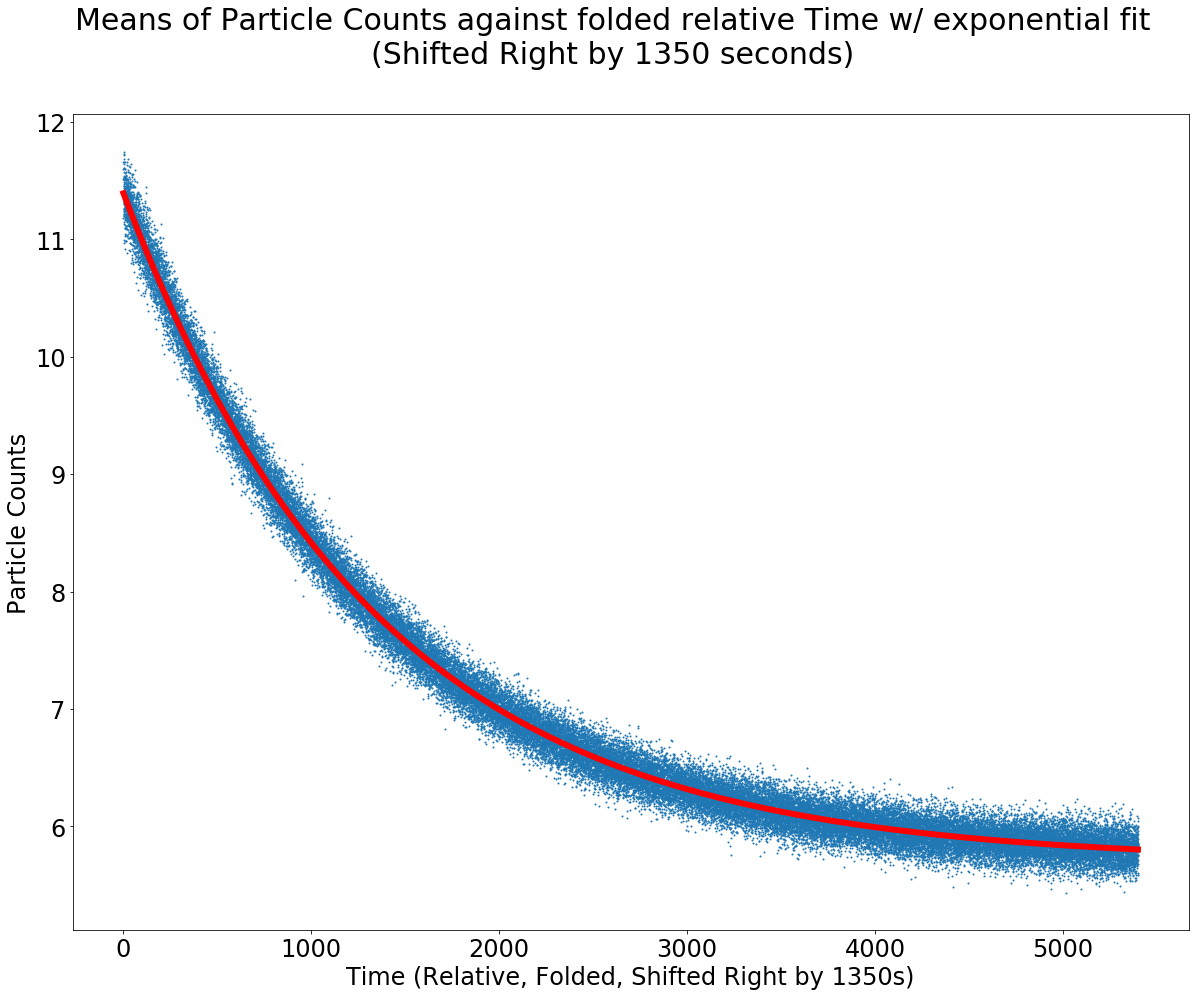

In [131]:
plt.suptitle('Means of Particle Counts against folded relative Time w/ exponential fit\n(Shifted Right by 1350 seconds)', fontsize = 30)
plt.xlabel('Time (Relative, Folded, Shifted Right by 1350s)', fontsize = 24)
plt.ylabel('Particle Counts', fontsize = 24)
plt.tick_params(labelsize = 24)
means_shift = np.append(means[40500:], means[0:40500])
plt.scatter(time_fold[0:54000], means_shift, s = 1)
x = np.linspace(0,5400,10000)
plt.plot(x, fit[0][0] * np.exp(fit[0][1]*(x-5400)) + fit[0][2], color = 'red', linewidth = 6)
plt.show()

Looks like it lies well in the middle of our scatterplot.

## Thus, I shall create the model for this dataset.
## The Probability Mass Function of the Particle Count $P(k,t)$ is a time dependent Poisson distribution
## such that $P(k, t) = e^{-\lambda}\frac{\lambda^k}{k!}$, where the mean $\lambda = 0.105 * e^{-0.00740(t - 5400 - 4050 + 5400n)} + 5.70$,
## or $\lambda = 0.105 * e^{-0.00740(t + 1350 + 5400n)} + 5.70$, where n is a interger.

The exponential curve for the mean fitted quite well with our scatterplot. We'll see how well it fits with our entire data.

In [186]:
#To make things easier, we first write the equation for the mean into a function:
def mean_fit(time):
    return fit[0][0] * np.exp(fit[0][1]*((time + 1350) % (-5400))) + fit[0][2]
        #Our function runs from exp(-5400) to exp(0), so we must mod with -5400!

Since the Probability Mass Function is periodic, we will generate one round of data(54000 entries per round) and see how it compares with the original.

In [21]:
len(data[3,:]) / 54000

480.0000185185185

In [22]:
len(data[3,:]) - 54000 * 480

1

Since we have 480 cycles and 1 entry, generating 480 values per Poisson distribution should give us roughly the same size.
<BR>As for the last extra one, we will just generate 481 values on our initial run (Since they are in phase) to account for that.

In [187]:
total_nums = len(data[3,:])
counts_model = np.zeros(total_nums)
time = time_fold[0:54000]
mean = mean_fit(time_fold[0])
# Inject into every 54000th entry to account for periodical property
counts_model[0::54000] = scipy.stats.poisson.rvs(mean,loc=0,size=481)
for i in np.arange(1,len(time)):
    mean = mean_fit(time_fold[i])
    counts_model[i::54000] = scipy.stats.poisson.rvs(mean,loc=0,size=480)
counts_model

array([7., 7., 6., ..., 6., 7., 6.])

We will plot the data above on a 2D histogram against time, as we did with the original data.

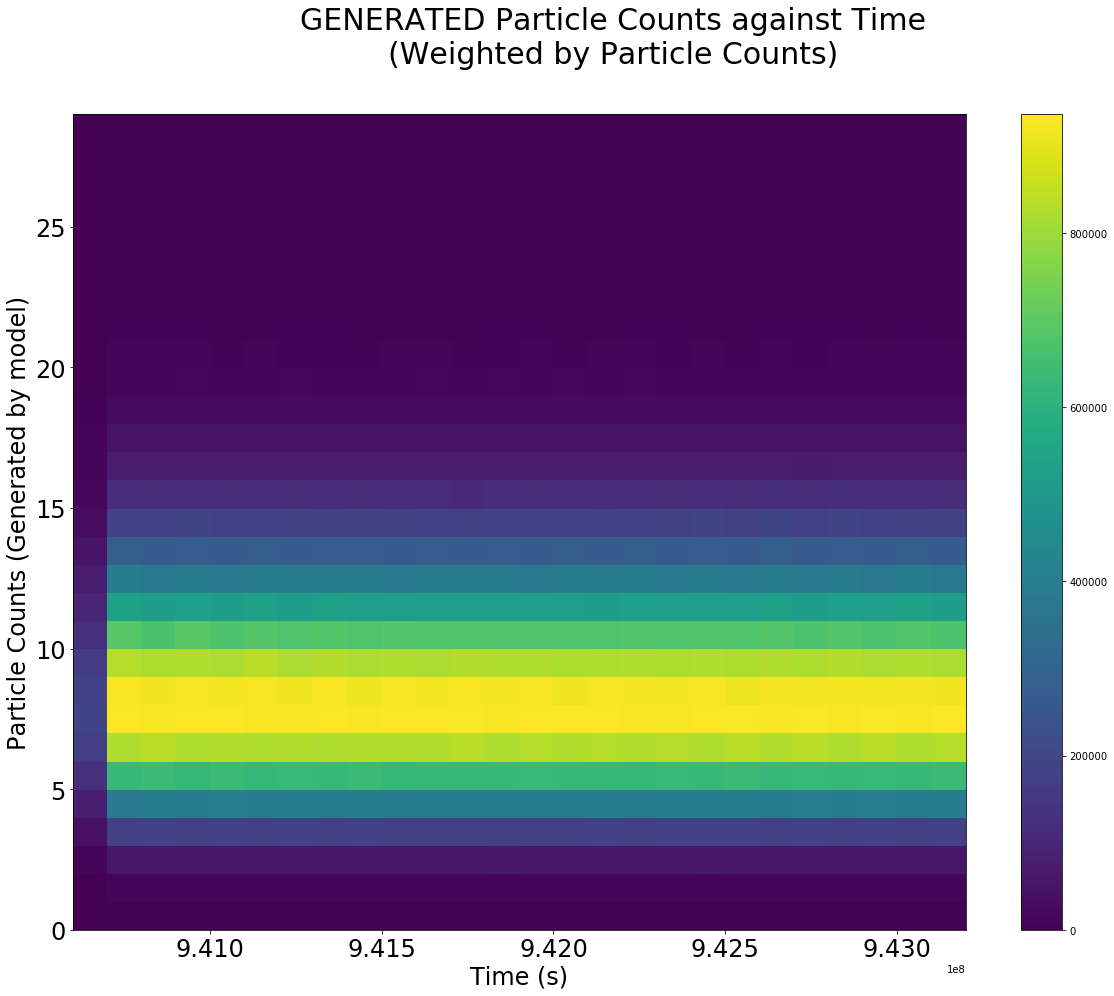

In [188]:
plt.suptitle('GENERATED Particle Counts against Time\n(Weighted by Particle Counts)', fontsize=30)
plt.xlabel('Time (s)', fontsize = 24)
plt.ylabel('Particle Counts (Generated by model)', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(9.406e+8,9.433e+8, 0.001e+8)
biny = np.arange(0,30)
plt.hist2d(data[0,:], counts_model,  bins = [binx, biny], weights = counts_model)
plt.colorbar()

Looks like the original, but it's not very interesting since it's a constant.
Let's try with Particle Count VS Earth longitude.

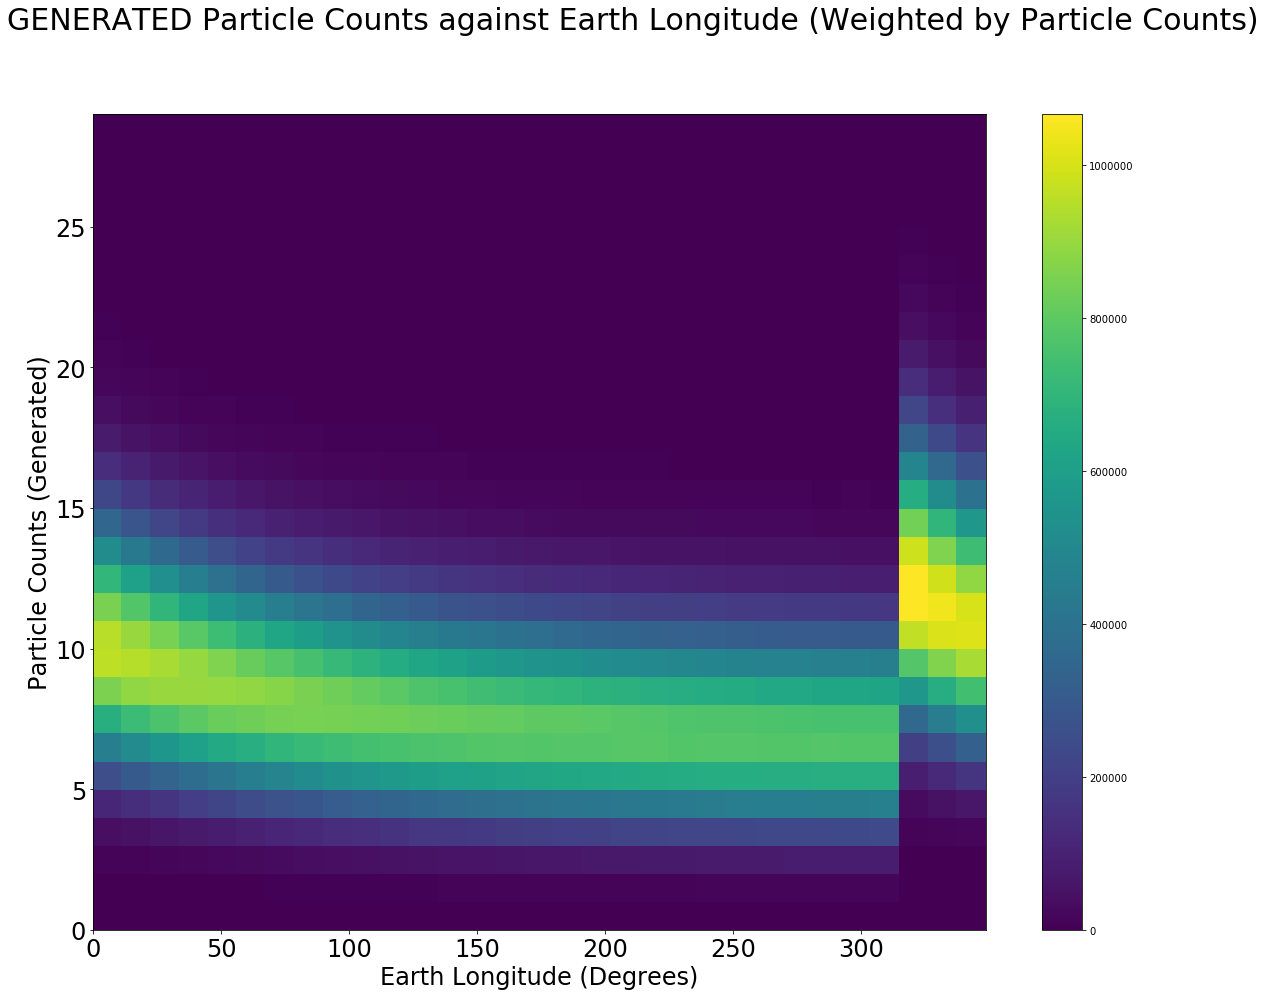

In [189]:
plt.suptitle('GENERATED Particle Counts against Earth Longitude (Weighted by Particle Counts)', fontsize=30)
plt.xlabel('Earth Longitude (Degrees)', fontsize = 24)
plt.ylabel('Particle Counts (Generated)', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0, 360, 11.25)
biny = np.arange(0,30)
plt.hist2d(data[2,:], counts_model,  bins = [binx, biny], weights = counts_model)
plt.colorbar()

Looks good, with the curve of the mean starting and ending in the right bins.

Next, we want to see the histogram in each peroid.

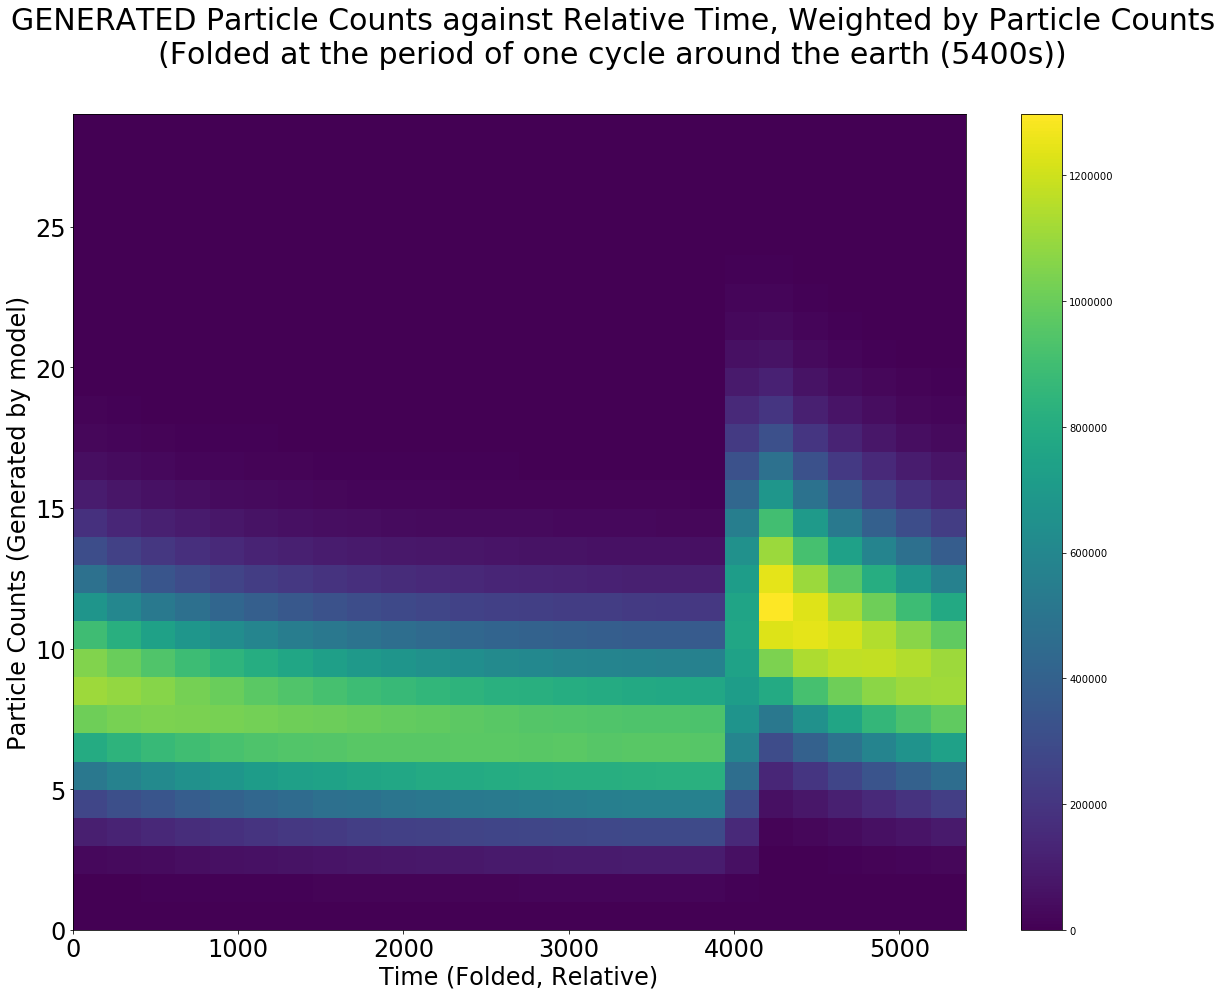

In [190]:
plt.suptitle('GENERATED Particle Counts against Relative Time, Weighted by Particle Counts\n(Folded at the period of one cycle around the earth (5400s))', fontsize=30)
plt.xlabel('Time (Folded, Relative)', fontsize = 24)
plt.ylabel('Particle Counts (Generated by model)', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.linspace(0, 5400, 27)
biny = np.arange(0,30)
plt.hist2d(time_fold, counts_model,  bins = [binx, biny], weights = counts_model)
plt.colorbar()
plt.show()

Great, looks just like the original!

Another way to check how good our model is is by checking the difference between real and modeled data.

In [199]:
real_against_model = counts_model - data[3,:]
real_against_model

array([-3., -1., -1., ..., -2., -4., -6.])

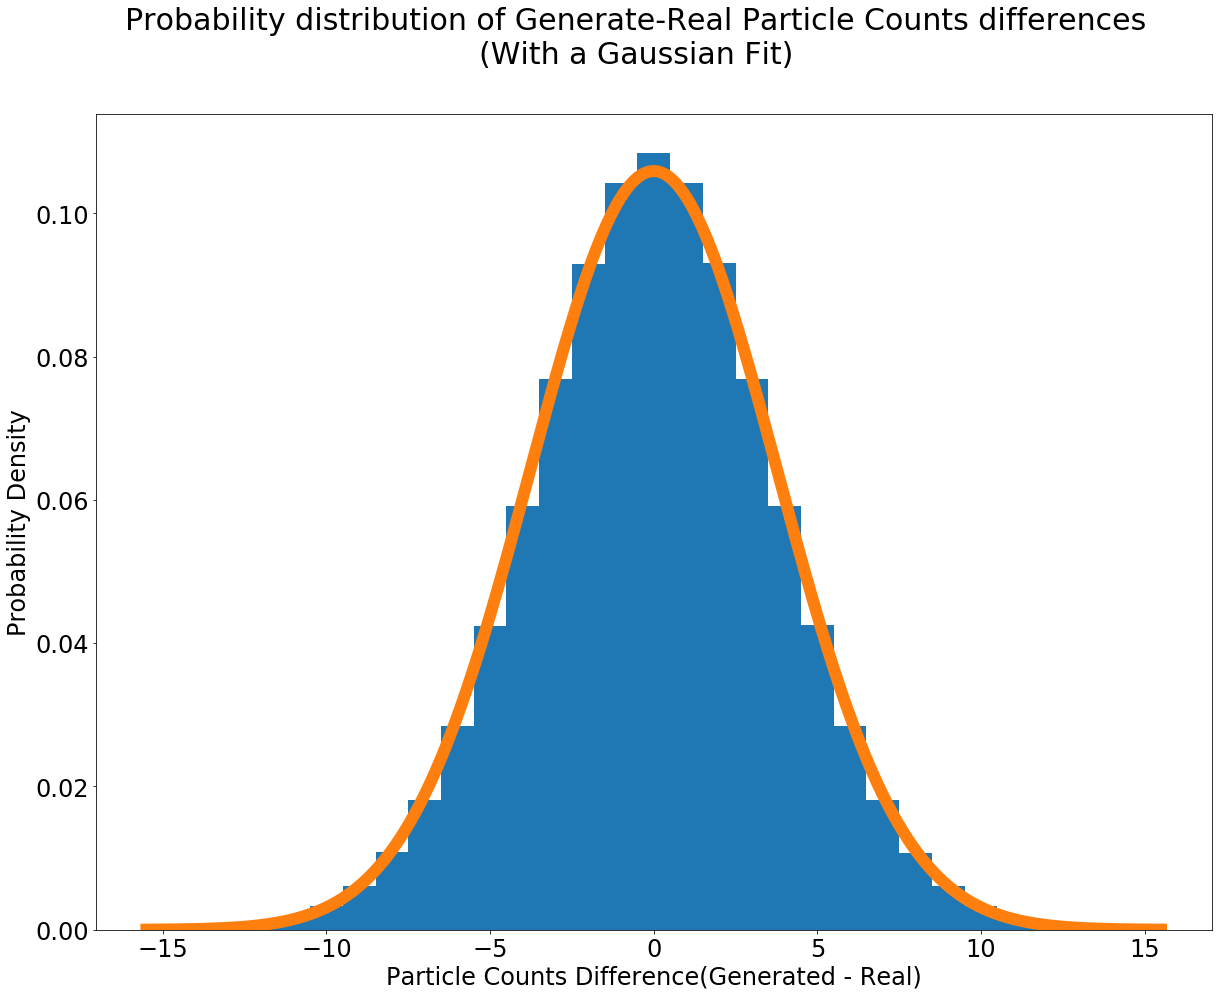

The distribution of the difference between Generated and Real particle counts could be best described by a Gaussian Distribution
Centered at -0.0002369598674012397 and has size 3.7676476432226047.


In [192]:
plt.suptitle('Probability distribution of Generate-Real Particle Counts differences\n(With a Gaussian Fit)', fontsize=30)
plt.xlabel('Particle Counts Difference(Generated - Real)', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(real_against_model, bins = np.arange(-15.5,15.5), density = True)
gaus_fit = scipy.stats.norm.fit(real_against_model)
x = np.linspace(-15.5,15.5, 1000)
plt.plot(x, scipy.stats.norm.pdf(x, loc=gaus_fit[0], scale = gaus_fit[1]), linewidth = 12)
plt.show()
print('The distribution of the difference between Generated and Real particle counts could be best described by a Gaussian Distribution\nCentered at ' + str(gaus_fit[0]) + ' and has size ' + str(gaus_fit[1]) +'.')

The distribution of the differences of our model against real data is almost centered at 0, which is good since this mean most of our difference is small.
<br>Also, 68% of the differences between model and real fall between [-3.77, -3.77], and 95% of the differences between model and real  fall between [-7.54, 7.54] which is also not a very large difference.

In [204]:
1 - np.count_nonzero(real_against_model)/len(real_against_model)

0.10834833686927714

Only 10.83% of our model-predicted data is identical to the real data.
<br>This is to be expected since the random nature of generating random variables from a known Poisson PMF makes it hard for the model and test to be the same.

In [194]:
sigma_1 = stats.norm.sf(1, loc=0, scale=1)
sigma_2 = stats.norm.sf(2, loc=0, scale=1)
print(stats.norm.isf(sigma_1, gaus_fit[0], gaus_fit[1]))
print(stats.norm.ppf(sigma_1, gaus_fit[0], gaus_fit[1]))
print(stats.norm.isf(sigma_2, gaus_fit[0], gaus_fit[1]))
print(stats.norm.ppf(sigma_2, gaus_fit[0], gaus_fit[1]))

3.7674106833552035
-3.767884603090006
7.535058326577812
-7.535532246312614


68% of the differences between model and real fall between [-3.77, -3.77]
<br>95% of the differences between model and real  fall between [-7.54, 7.53]

## 4

We already have our model, which gives us an average for the PDF of the Poisson distribution at any given time.
<br>With PDF already known, we will directly know what the 5-sigma threashold is for every time instance.

In [116]:
sigma_5 = stats.norm.sf(5, loc=0, scale=1)
sigma_5

2.866515718791933e-07

In [155]:
# We generalize the sigma-finding process into a function.
def find_5_sigma(i):
    print("You requested to find the '5-sigma' threashold at time " + str(i * 0.1 + data[0,0]) + ' seconds.')
    mean = mean_fit(i * 0.1)
    # return mean
    print("This time corresponds to a mean of " + str(mean) + '.')
    threashold = stats.poisson.isf(sigma_5, mu = mean, loc = 0)
    print("The 5-sigma' threashold at time " + str(i * 0.1 + data[0,0]) + " seconds is " + str(threashold))
    return threashold

In [165]:
def find_5_sigma(i):
    #print("You requested to find the '5-sigma' threashold at time " + str(i * 0.1 + data[0,0]) + ' seconds.')
    mean = mean_fit(i * 0.1)
    return mean
    #print("This time corresponds to a mean of " + str(mean) + '.')
    #threashold = stats.poisson.isf(sigma_5, mu = mean, loc = 0)
    #print("The 5-sigma' threashold at time " + str(i * 0.1 + data[0,0]) + " seconds is " + str(threashold))
    #return threashold

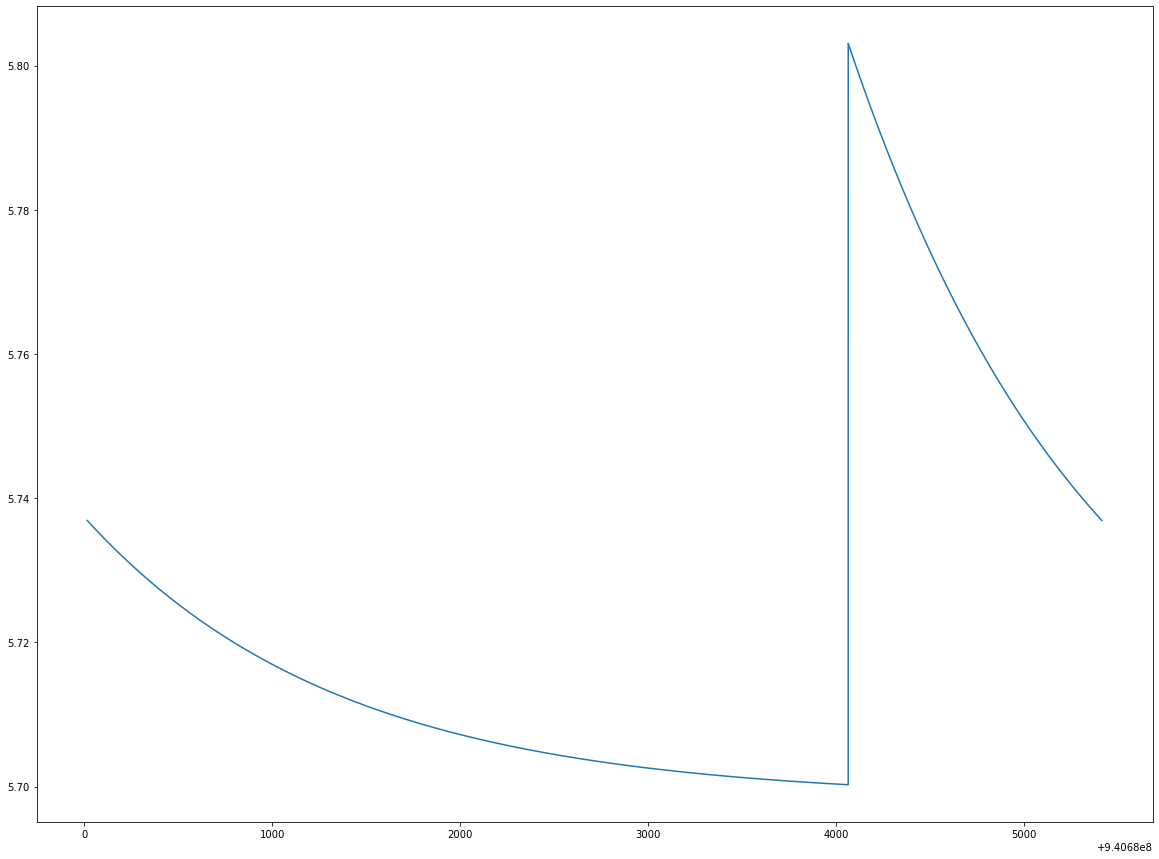

In [166]:
plt.plot(data[0,0:54000], find_5_sigma(np.arange(0,54000)))

In [164]:
find_5_sigma(40450)

You requested to find the '5-sigma' threashold at time 940684061.0 seconds.
This time corresponds to a mean of 5.7002550456169985.
The 5-sigma' threashold at time 940684061.0 seconds is 21.0


21.0

In [144]:
find_5_sigma(40501)

You requested to find the '5-sigma' threashold at time 940684066.1 seconds.
This time corresponds to a mean of 5.803076017846994.
The 5-sigma' threashold at time 940684066.1 seconds is 21.0


21.0

# Problem 2

File Import:

In [134]:
hf = h5py.File('images.h5', 'r')
hf.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [135]:
image1 = np.array(hf.get('image1'))


In [136]:
imagestack = np.array(hf.get('imagestack'))

In [137]:
hf.close()

In [160]:
print(max(image1.flatten()))
print(min(image1.flatten()))
print(max(imagestack.flatten()))
print(min(imagestack.flatten()))

46.84317561571535
-2.3061570283216652
47.79010819628649
-2.709336827866645


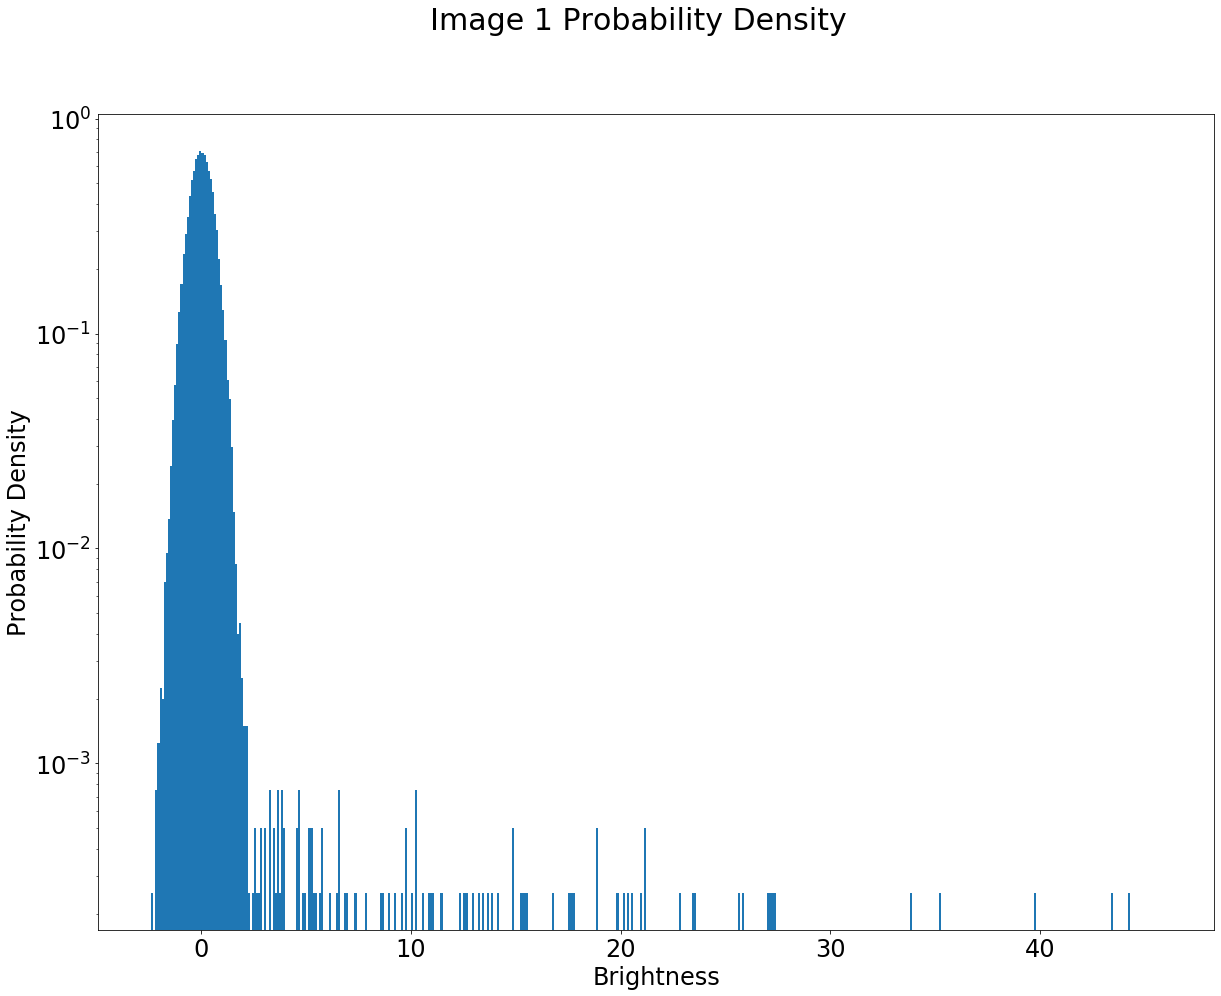

In [163]:
plt.suptitle('Image 1 Probability Density', fontsize=30)
plt.xlabel('Brightness', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(image1.flatten(), bins = np.arange(-2.5,46, 0.1), density = True)
plt.show()

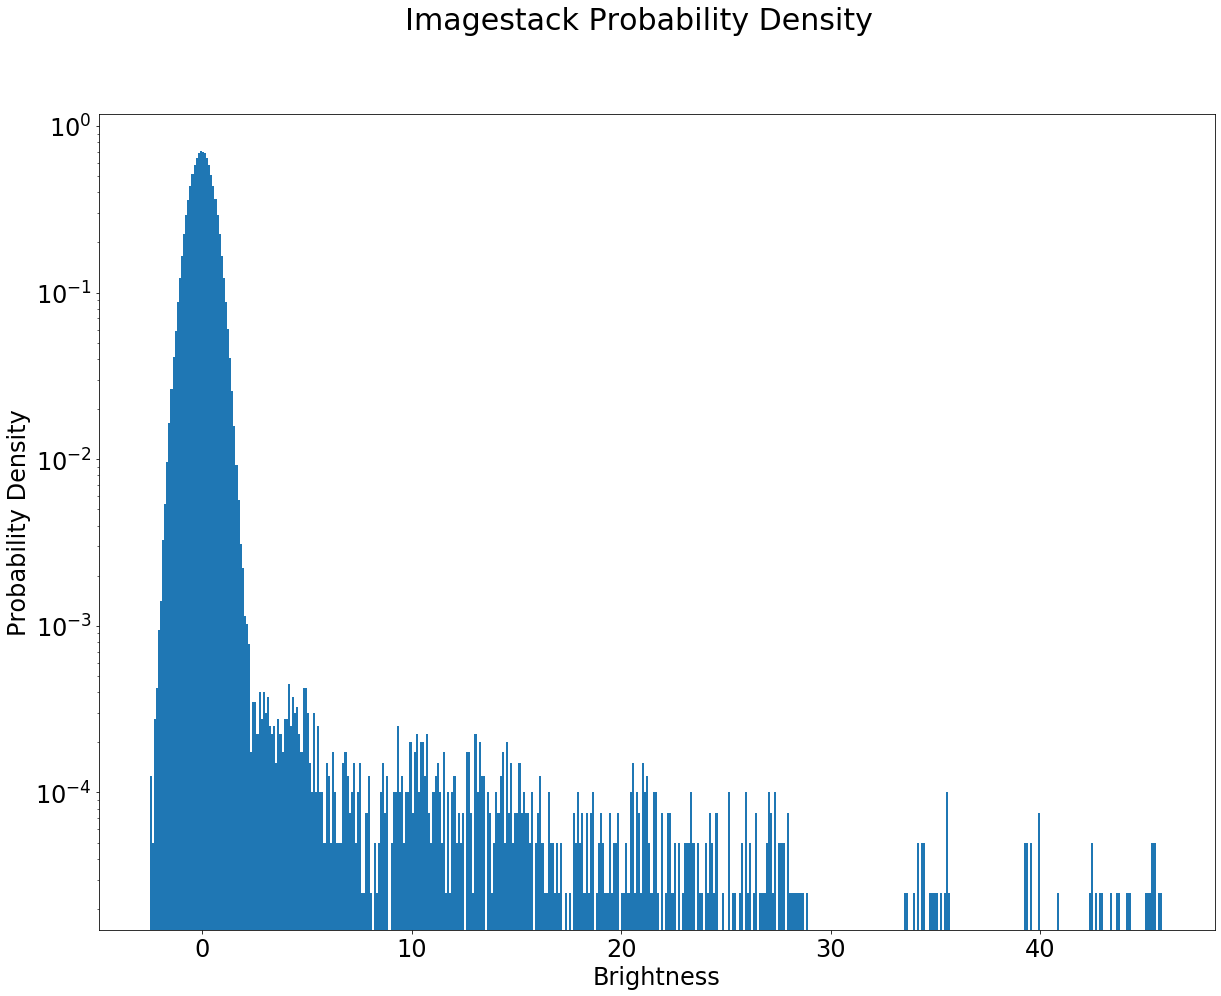

In [164]:
plt.suptitle('Imagestack Probability Density', fontsize=30)
plt.xlabel('Brightness', fontsize = 24)
plt.ylabel('Probability Density', fontsize = 24)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.hist(imagestack.flatten(), bins = np.arange(-2.5,46, 0.1), density = True)
plt.show()

In [220]:
360 * 52/53

353.20754716981133